# Pandas 数据处理

我们之前详细介绍了 NumPy 和它的 ndarray 对象，这个对象为 Python 多维数组提供了高效的存储和处理方法。下面，我们将基于前面的知识，深入学习 Pandas 程序库提
供的数据结构。Pandas 是在 NumPy 基础上建立的新程序库，提供了一种高效的 DataFrame 数据结构。DataFrame 本质上是一种带行标签和列标签、支持相同类型数据和缺失值的多维数组。Pandas 不仅为带各种标签的数据提供了便利的存储界面，还实现了许多强大的操作，这些操作对数据库框架和电子表格程序的用户来说非常熟悉。
正如我们之前看到的那样，NumPy 的 ndarray 数据结构为数值计算任务中常见的干净整齐、组织良好的数据提供了许多不可或缺的功能。虽然它在这方面做得很好，但是当我们需要处理更灵活的数据任务（如为数据添加标签、处理缺失值等），或者需要做一些不是对每个元素都进行广播映射的计算（如分组、透视表等）时，NumPy 的限制就非常明显了，而这些都是分析各种非结构化数据时很重要的一部分。建立在 NumPy 数组结构上的Pandas，尤其是它的 Series 和 DataFrame 对象，为数据科学家们处理那些消耗大量时间的
“数据清理”（data munging）任务提供了捷径。

这里将重点介绍 Series、DataFrame 和其他相关数据结构的高效使用方法。我们会酌情使用真实数据集作为演示示例，但这些示例本身并不是学习重点。

## 　安装并使用 Pandas

在安装 Pandas 之前，确保你的操作系统中有 NumPy。如果你是从源代码直接编译，那么还需要相应的工具编译建立 Pandas 所需的 C 语言与 Cython 代码。详细的安装方法，请参考 Pandas 官方文档（http://pandas.pydata.org）。如果你使用了 Anaconda，
那么 Pandas 就已经安装好了。

Pandas 安装好之后，可以导入它检查一下版本号：

In [1]:
import pandas
pandas.__version__

'1.4.3'

需要注意的是，本文档基于 Pandas 1.4.3 和 Numpy 1.22.3 测试，若后续版本更新导致该文档中某些内容不再适用，请以官方文档为准！

和之前导入 NumPy 并使用别名 np 一样，我们将导入 Pandas 并使用别名 pd：

In [2]:
import pandas as pd

在下面会沿用这种简写方式。

## 关于显示内置文档的提醒

不要忘了 IPython 可以快速浏览软件包的内容（通过 Tab 键补全功
能），以及各种函数的文档（使用 ?）。

例如，可以通过按下 Tab 键显示 pandas 命名空间的所有内容：

```ipython
In [3]: pd.<TAB>
```

如果要显示 Pandas 的内置文档，可以这样做：

```ipython
In [4]: pd?
```

详细的文档请参考 http://pandas.pydata.org，里面除了有基础教程，还有许多有用
的资源。

# Pandas 对象简介

如果从底层视角观察 Pandas 对象，可以把它们看成增强版的 NumPy 结构化数组，行列都
不再只是简单的整数索引，还可以带上标签。在后面的内容中我们将会发现，虽然 Pandas 在基本数据结构上实现了许多便利的工具、方法和功能，但是后面将要介绍的每
一个工具、方法和功能几乎都需要我们理解基本数据结构的内部细节。因此，在深入学习
Pandas 之前，先来看看 Pandas 的三个基本数据结构：Series、DataFrame 和 Index。

从导入标准 NumPy 和 Pandas 开始：

In [3]:
import numpy as np
import pandas as pd

## Pandas 的 Series 对象

Pandas 的 Series 对象是一个带索引数据构成的一维数组。可以用一个数组创建 Series 对象，如下所示：

In [4]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

从上面的结果中，你会发现 Series 对象将一组数据和一组索引绑定在一起，我们可以通过
values 属性和 index 属性获取数据。values 属性返回的结果与 NumPy 数组类似：

In [5]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

index 属性返回的结果是一个类型为 pd.Index 的类数组对象，我们将在后面的内容里详细介绍它：

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

和 NumPy 数组一样，数据可以通过 Python 的中括号索引标签获取：

In [7]:
data[1]

0.5

In [8]:
data[1:3]

1    0.50
2    0.75
dtype: float64

但是我们将会看到，Pandas 的 Series 对象比它模仿的一维 NumPy 数组更加通用、灵活。

### Serises 是通用的 NumPy 数组

到目前为止，我们可能觉得 Series 对象和一维 NumPy 数组基本可以等价交换，但两者间的本质差异其实是索引：NumPy 数组通过隐式定义的整数索引获取数值，而 Pandas 的
Series 对象用一种显式定义的索引与数值关联。

显式索引的定义让 Series 对象拥有了更强的能力。例如，索引不再仅仅是整数，还可以是任意想要的类型。如果需要，完全可以用字符串定义索引：

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

获取数值的方式与之前一样：

In [10]:
data['b']

0.5

也可以使用不连续或不按顺序的索引：

In [11]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [12]:
data[5]

0.5

### Series 是特殊的字典

你可以把 Pandas 的 Series 对象看成一种特殊的 Python 字典。字典是一种将任意键映射到
一组任意值的数据结构，而 Series 对象其实是一种将类型键映射到一组类型值的数据结构。类型至关重要：就像 NumPy 数组背后特定类型的经过编译的代码使得它在某些操作上比普通的 Python 列表更加高效一样，Pandas Series 的类型信息使得它在某些操作上比
Python 的字典更高效。

我们可以直接用 Python 的字典创建一个 Series 对象，让 Series 对象与字典的类比更加清晰：

In [13]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

用字典创建 Series 对象时，其索引默认保持数据原本在字典中的顺序（版本0.23.0及以后）。典型的字典数值获取方式仍然有效：

In [14]:
population['California']

38332521

和字典不同，Series 对象还支持数组形式的操作，比如切片：

In [15]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

我们将在后面介绍 Pandas 取值与切片的一些技巧。

### 创建 Series 对象

我们已经见过几种创建 Pandas 的 Series 对象的方法，都是像这样的形式：

```python
>>> pd.Series(data, index=index)
```

其中，index 是一个可选参数，data 参数支持多种数据类型。

例如，data 可以是列表或 NumPy 数组，这时 index 默认值为整数序列：

In [16]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

data 也可以是一个标量，创建 Series 对象时会重复填充到每个索引上：

In [17]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

data 还可以是一个字典，index 默认是排序的字典键：

In [18]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

每一种形式都可以通过显式指定索引筛选需要的结果：

In [19]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

这里需要注意的是，Series 对象只会保留显式定义的键值对。

## Pandas 的 DataFrame 对象

Pandas 的另一个基础数据结构是 DataFrame。和之前介绍的 Series 对象一样，DataFrame 既可以作为一个通用型 NumPy 数组，也可以看作特殊的 Python 字典。下面来分别看看。

###  DataFrame 是通用的 NumPy 数组

如果将 Series 类比为带灵活索引的一维数组，那么 DataFrame 就可以看作是一种既有灵活
的行索引，又有灵活列名的二维数组。就像你可以把二维数组看成是有序排列的一维数组
一样，你也可以把 DataFrame 看成是有序排列的若干 Series 对象。这里的“排列”指的是
它们拥有共同的索引。

下面用美国五个州面积的数据创建一个新的 Series 来进行演示：

In [20]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

再结合之前创建的 population 的 Series 对象，用一个字典创建一个包含这些信息的二维
对象：

In [21]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


和 Series 对象一样，DataFrame 也有一个 index 属性可以获取索引标签：

In [22]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

另外，DataFrame 还有一个 columns 属性，是存放列标签的 Index 对象：

In [23]:
states.columns

Index(['population', 'area'], dtype='object')

因此 DataFrame 可以看作一种通用的 NumPy 二维数组，它的行与列都可以通过索引获取。

###  DataFrame 是特殊的字典

与 Series 类似，我们也可以把 DataFrame 看成一种特殊的字典。字典是一个键映射一个值，而 DataFrame 是一列映射一个 Series 的数据。例如，通过 'area' 的列属性可以返回
包含面积数据的 Series 对象：

In [24]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

这里需要注意的是，在 NumPy 的二维数组里，data[0] 返回第一行；而在 DataFrame 中，
data['col0'] 返回第一列。因此，最好把 DataFrame 看成一种通用字典，而不是通用数
组，即使这两种看法在不同情况下都是有用的。后面将介绍更多 DataFrame 灵活取值的方法。

###  创建 DataFrame 对象

Pandas 的 DataFrame 对象可以通过许多方式创建，这里举几个常用的例子。

####  通过单个 Series 对象创建

DataFrame 是一组 Series 对象的集合，可以用单个 Series创建一个单列的 DataFrame：

In [25]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


#### 通过字典列表创建

任何元素是字典的列表都可以变成 DataFrame。用一个简单的列表综合来创建一些数据：

In [26]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


即使字典中有些键不存在，Pandas 也会用缺失值 NaN（不是数字，not a number）来表示：

In [27]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### 通过 Series 对象字典创建

就像之前见过的那样，DataFrame 也可以用一个由 Series对象构成的字典创建：

In [28]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


#### 通过 NumPy 二维数组创建

假如有一个二维数组，就可以创建一个可以指定行列索引值的 DataFrame。如果不指定行列索引值，那么行列默认都是整数索引值：

In [29]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.380397,0.328399
b,0.303661,0.393356
c,0.363551,0.560917


#### 通过 NumPy 结构化数组创建

由于 Pandas 的 DataFrame与结构化数组十分相似，因此可以通过结构化数组创建 DataFrame：

In [30]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [31]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## Pandas 的 Index 对象

我们已经发现，Series 和 DataFrame 对象都使用便于引用和调整的显式索引。Pandas 的 Index 对象是一个很有趣的数据结构，可以将它看作是一个不可变数组或有序集合（实际上是一个多集，因为 Index 对象可能会包含重复值）。这两种观点使得 Index 对象能呈现一些有趣的功能。让我们用一个简单的整数列表来创建一个 Index 对象：

In [32]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### 将 Index 看作不可变数组

Index 对象的许多操作都像数组。例如，可以通过标准 Python 的取值方法获取数值，也可以通过切片获取数值：

In [33]:
ind[1]

3

In [34]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

Index 对象还有许多与 NumPy 数组相似的属性：

In [35]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


Index 对象与 NumPy 数组之间的不同在于，Index 对象的索引是不可变的，也就是说不能通过通常的方式进行调整：

In [36]:
ind[1] = 0

TypeError: Index does not support mutable operations

Index 对象的不可变特征使得多个 DataFrame 和数组之间进行索引共享时更加安全，尤其是可以避免因修改索引时粗心大意而导致的副作用。

###  将 Index 看作有序集合

Pandas 对象被设计用于实现许多操作，如连接（join）数据集，其中会涉及许多集合操作。
Index 对象遵循 Python 标准库的集合（set）数据结构的许多习惯用法，包括并集、交集、差集等

In [37]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [38]:
indA.intersection(indB)  # intersection

Int64Index([3, 5, 7], dtype='int64')

In [39]:
indA.union(indB)  # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [40]:
indA.symmetric_difference(indB)  # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

# 数据取值与选择

之前具体介绍了获取、设置、调整 NumPy 数组数值的方法与工具，包括取值操作（如arr[2, 1]）、切片操作（如 arr[:, 1:5]）、掩码操作（如 arr[arr > 0]）、花哨的索引操作（如 arr[0, [1, 5]]），以及组合操作（如 arr[:, [1, 5]]）。下面介绍 Pandas 的 Series 和 DataFrame 对象相似的数据获取与调整操作。如果你用过 NumPy 操作模式，就会非常熟悉 Pandas 的操作模式，只是有几个细节需要注意一下。

我们将从简单的一维 Series 对象开始，然后再用比较复杂的二维 DataFrame 对象进行演示。

## Series 数据选择方法

如前所述，Series 对象与一维 NumPy 数组和标准 Python 字典在许多方面都一样。只要牢牢记住这两个类比，就可以帮助我们更好地理解 Series 对象的数据索引与选择模式。

### 将Series看作字典

和字典一样，Series 对象提供了键值对的映射：

In [41]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [42]:
data['b']

0.5

我们还可以用 Python 字典的表达式和方法来检测键 / 索引和值：

In [43]:
'a' in data

True

In [44]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [45]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

Series 对象还可以用字典语法调整数据。就像你可以通过增加新的键扩展字典一样，你也可以通过增加新的索引值扩展 Series：

In [46]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

Series 对象的可变性是一个非常方便的特性：Pandas 在底层已经为可能发生的内存布局和数据复制自动决策，用户不需要担心这些问题。

### 将 Series 看作一维数组

Series 不仅有着和字典一样的接口，而且还具备和 NumPy 数组一样的数组数据选择功能，包括索引、掩码、花哨的索引等操作，具体示例如下所示：

In [47]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [48]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [49]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [50]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

在以上示例中，切片是绝大部分混乱之源。需要注意的是，当使用显式索引（即data['a':'c']）作切片时，结果包含最后一个索引；而当使用隐式索引（即 data[0:2]）作切片时，结果不包含最后一个索引。

### 索引器：loc 和 iloc

这些切片和取值的习惯用法经常会造成混乱。例如，如果你的 Series 是显式整数索引，那么 data[1] 这样的取值操作会使用显式索引，而 data[1:3] 这样的切片操作却会使用隐式索引。

In [51]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [52]:
# explicit index when indexing
data[1]

'a'

In [53]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

由于整数索引很容易造成混淆，所以 Pandas 提供了一些索引器（indexer）属性来作为取值的方法。它们不是 Series 对象的函数方法，而是暴露切片接口的属性。

第一种索引器是 loc 属性，表示取值和切片都是显式的：

In [54]:
data.loc[1]

'a'

In [55]:
data.loc[1:3]

1    a
3    b
dtype: object

第二种是 iloc 属性，表示取值和切片都是 Python 形式的隐式索引：

In [56]:
data.iloc[1]

'b'

In [57]:
data.iloc[1:3]

3    b
5    c
dtype: object

Python 代码的设计原则之一是“显式优于隐式”。使用 loc 和 iloc 可以让代码更容易维护，可读性更高。特别是在处理整数索引的对象时，我强烈推荐使用这两种索引器。它们既可以让代码阅读和理解起来更容易，也能避免因误用索引 / 切片而产生的小 bug。

## DataFrame 数据选择方法

前面曾提到，DataFrame 在有些方面像二维或结构化数组，在有些方面又像一个共享索引的若干 Series 对象构成的字典。这两种类比可以帮助我们更好地掌握这种数据结构的数据选择方法。

### 将 DataFrame 看作字典

第一种类比是把 DataFrame 当作一个由若干 Series 对象构成的字典。让我们用之前的美国
五州面积与人口数据来演示：

In [58]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


两个 Series 分别构成 DataFrame 的一列，可以通过对列名进行字典形式（dictionary-style）
的取值获取数据：

In [59]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

同样，也可以用属性形式（attribute-style）选择纯字符串列名的数据：

In [60]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

对同一个对象进行属性形式与字典形式的列数据，结果是相同的：

In [61]:
data.area is data['area']

True

虽然属性形式的数据选择方法很方便，但是它并不是通用的。如果列名不是纯字符串，或者列名与 DataFrame 的方法同名，那么就不能用属性索引。例如，DataFrame 有一个 pop()方法，如果用 data.pop 就不会获取 'pop' 列，而是显示为方法：

In [62]:
data.pop is data['pop']

False

另外，还应该避免对用属性形式选择的列直接赋值（即可以用 data['pop'] = z，但不要用data.pop = z）。

和前面介绍的 Series 对象一样，还可以用字典形式的语法调整对象，如果要增加一列可以这样做：

In [63]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


这里演示了两个 Series 对象算术运算的简便语法，我们将在后面进行详细介绍。

###  将 DataFrame 看作二维数组

前面曾提到，可以把 DataFrame 看成是一个增强版的二维数组，用 values 属性按行查看数组数据：

In [64]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

理解了这一点，就可以把许多数组操作方式用在 DataFrame 上。例如，可以对 DataFrame进行行列转置：

In [65]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


通过字典形式对列进行取值显然会限制我们把 DataFrame 作为 NumPy 数组可以获得的能力，尤其是当我们在 DataFrame 数组中使用单个行索引获取一行数据时：

In [66]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

而获取一列数据就需要向 DataFrame 传递单个列索引：

In [67]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

因此，在进行数组形式的取值时，我们就需要用另一种方法——前面介绍过的 Pandas 索引器 loc、iloc 和 ix 了。通过 iloc 索引器，我们就可以像对待 NumPy 数组一样索引 Pandas的底层数组（Python 的隐式索引），DataFrame 的行列标签会自动保留在结果中：

In [68]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


类似地，使用loc索引器，我们可以以类似数组的样式索引底层数据，但要使用显式索引和列名：

In [69]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


任何用于处理 NumPy 形式数据的方法都可以用于这些索引器。例如，可以在 loc 索引器中结合使用掩码与花哨的索引方法：

In [70]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


任何一种取值方法都可以用于调整数据，这一点和 NumPy 的常用方法是相同的：

In [71]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


如果你想熟练使用 Pandas 的数据操作方法，最好花点时间在一个简单的 DataFrame 上练习不同的取值方法，包括查看索引类型、切片、掩码和花哨的索引操作。

###  其他取值方法

还有一些取值方法和前面介绍过的方法不太一样。它们虽然看着有点奇怪，但是在实践中还是很好用的。首先，如果对单个标签取值就选择列，而对多个标签用切片就选择行：

In [72]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


切片也可以不用索引值，而直接用行数来实现：

In [73]:
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


与之类似，掩码操作也可以直接对每一行进行过滤，而不需要使用 loc 索引器：

In [74]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


这两种操作方法其实与 NumPy 数组的语法类似，虽然它们与 Pandas 的操作习惯不太一致，但是在实践中非常好用。

# Pandas 数值运算方法

NumPy 的基本能力之一是快速对每个元素进行运算，既包括基本算术运算（加、减、乘、除），也包括更复杂的运算（三角函数、指数函数和对数函数等）。Pandas 继承了 NumPy的功能，但是 Pandas 也实现了一些高效技巧：对于一元运算（像函数与三角函数），这些通用函数将在输出结果中保留索引和列标签；而对于二元运算（如加法和乘法），Pandas 在传递通用函数时会自动对齐索引进行计算。这就意味着，保存数据内容与组合不同来源的数据——两处在 NumPy 数组中都容易出错的地方——变成了 Pandas 的杀手锏。后面还会介绍一些关于一维 Series 和二维 DataFrame 的便捷运算方法。

## 通用函数：保留索引

因为 Pandas 是建立在 NumPy 基础之上的，所以 NumPy 的通用函数同样适用于 Pandas 的Series 和 DataFrame 对象。让我们用一个简单的 Series 和 DataFrame 来演示：

In [75]:
import pandas as pd
import numpy as np

In [76]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [77]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


如果对这两个对象的其中一个使用 NumPy 通用函数，生成的结果是另一个保留索引的Pandas 对象：

In [78]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

或者，再做一个比较复杂的运算：

In [79]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


## 通用函数：索引对齐

当在两个 Series 或 DataFrame 对象上进行二元计算时，Pandas 会在计算过程中对齐两个对象的索引。当你处理不完整的数据时，这一点非常方便，我们将在后面的示例中看到。

###  Series 索引对齐

来看一个例子，假如你要整合两个数据源的数据，其中一个是美国面积最大的三个州的面 积数据，另一个是美国人口最多的三个州的人口数据：

In [80]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

来看看如果用人口除以面积会得到什么样的结果：

In [81]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

结果数组的索引是两个输入数组索引的并集。我们也可以用 Python 标准库的集合运算法则来获得这个索引：

In [82]:
area.index.union(population.index)

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

对于缺失位置的数据，Pandas 会用 NaN 填充，表示“此处无数”。这是 Pandas 表示缺失值的方法。这种索引对齐方式是通过 Python 内置的集合运算规则实现的，任何缺失值默认都用 NaN 填充：

In [83]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

如果用 NaN 值不是我们想要的结果，那么可以用适当的对象方法代替运算符。例如，A.add(B) 等价于 A + B，也可以设置参数自定义 A 或 B 缺失的数据：

In [84]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### DataFrame 索引对齐

在计算两个 DataFrame 时，类似的索引对齐规则也同样会出现在共同（并集）列中：

In [85]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [86]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [87]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


你会发现，两个对象的行列索引可以是不同顺序的，结果的索引会自动按顺序排列。在Series 中，我们可以通过运算符方法的 fill_value 参数自定义缺失值。这里，我们将用 A中所有值的均值来填充缺失值（计算 A 的均值需要用 stack 将二维数组压缩成一维数组）：

In [88]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


下表列举了与 Python 运算符相对应的 Pandas 对象方法。

| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |


## 通用函数：DataFrame 与 Series 的运算

我们经常需要对一个 DataFrame 和一个 Series 进行计算，行列对齐方式与之前类似。也就是说，DataFrame 和 Series 的运算规则，与 NumPy 中二维数组与一维数组的运算规则是一样的。来看一个常见运算，让一个二维数组减去自身的一行数据：

In [89]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [90]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

根据 NumPy 的广播规则，让二维数组减自身的一行数据会按行计算。在 Pandas 里默认也是按行运算的：

In [91]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


如果你想按列计算，那么就需要利用前面介绍过的运算符方法，通过 axis 参数设置：

In [92]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


你会发现 DataFrame / Series 的运算与前面介绍的运算一样，结果的索引都会自动对齐：

In [93]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int64

In [94]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


这些行列索引的保留与对齐方法说明 Pandas 在运算时会一直保存这些数据内容，从而避免在处理数据类型有差异和 / 或维度不一致的 NumPy 数组时可能遇到的问题。

# 处理缺失值

我们将介绍一些处理缺失值的通用规则，Pandas 对缺失值的表现形式，并演示 Pandas 自带的几个处理缺失值的工具的用法。涉及的缺失值主要有三种形式：null、NaN 或 NA。

## 选择处理缺失值的方法

在数据表或 DataFrame 中有很多识别缺失值的方法。一般情况下可以分为两种：一种方法是通过一个覆盖全局的掩码表示缺失值，另一种方法是用一个标签值（sentinel value）表示缺失值。

在掩码方法中，掩码可能是一个与原数组维度相同的完整布尔类型数组，也可能是用一个比特（0 或 1）表示有缺失值的局部状态。

在标签方法中，标签值可能是具体的数据（例如用 -9999 表示缺失的整数），也可能是些极少出现的形式。另外，标签值还可能是更全局的值，比如用 NaN（不是一个数）表示缺失的浮点数，它是 IEEE 浮点数规范中指定的特殊字符。

使用这两种方法之前都需要先综合考量：使用单独的掩码数组会额外出现一个布尔类型数组，从而增加存储与计算的负担；而标签值方法缩小了可以被表示为有效值的范围，可能需要在 CPU 或 GPU 算术逻辑单元中增加额外的（往往也不是最优的）计算逻辑。通常使用的 NaN 也不能表示所有数据类型。

大多数情况下，都不存在最佳选择，不同的编程语言与系统使用不同的方法。例如，R 语言在每种数据类型中保留一个比特作为缺失数据的标签值，而 SciDB 系统会在每个单元后面加一个额外的字节表示 NA 状态。

## Pandas 的缺失值

Pandas 里处理缺失值的方式延续了 NumPy 程序包的方式，并没有为浮点数据类型提供内置的 NA 作为缺失值。

Pandas 原本也可以按照 R 语言采用的比特模式为每一种数据类型标注缺失值，但是这种方法非常笨拙。R 语言包含 4 种基本数据类型，而 NumPy 支持的类型远超 4 种。例如，R 语言只有一种整数类型，而 NumPy 支持 14 种基本的整数类型，可以根据精度、符号、编码类型按需选择。如果要为 NumPy 的每种数据类型都设置一个比特标注缺失值，可能需要为不同类型的不同操作耗费大量的时间与精力，其工作量几乎相当于创建一个新的 NumPy程序包。另外，对于一些较小的数据类型（例如 8 位整型数据），牺牲一个比特作为缺失值标注的掩码还会导致其数据范围缩小。

当然，NumPy 也是支持掩码数据的，也就是说可以用一个布尔掩码数组为原数组标注“无缺失值”或“有缺失值”。Pandas 也集成了这个功能，但是在存储、计算和编码维护方面都需要耗费不必要的资源，因此这种方式并不可取。

综合考虑各种方法的优缺点，Pandas 最终选择用标签方法表示缺失值，包括两种 Python 原有的缺失值：浮点数据类型的 NaN 值，以及 Python 的 None 对象。后面我们将会发现，虽然这么做也会有一些副作用，但是在实际运用中的效果还是不错的。

### None：Python 对象类型的缺失值

Pandas 可以使用的第一种缺失值标签是 None，它是一个 Python 单体对象，经常在代码中表示缺失值。由于 None 是一个 Python 对象，所以不能作为任何 NumPy / Pandas 数组类型的缺失值，只能用于 'object' 数组类型（即由 Python 对象构成的数组）：

In [95]:
import numpy as np
import pandas as pd

In [96]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

这里 dtype=object 表示 NumPy 认为由于这个数组是 Python 对象构成的，因此将其类型判断为 object。虽然这种类型在某些情景中非常有用，对数据的任何操作最终都会在Python 层面完成，但是在进行常见的快速操作时，这种类型比其他原生类型数组要消耗更多的资源：

In [97]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
84.4 ms ± 2.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.35 ms ± 72.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



使用 Python 对象构成的数组就意味着如果你对一个包含 None 的数组进行累计操作，如sum() 或者 min()，那么通常会出现类型错误：

In [98]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

这就是说，在 Python 中没有定义整数与 None 之间的加法运算。

###  NaN：数值类型的缺失值

另一种缺失值的标签是 NaN（全称 Not a Number，不是一个数字），是一种按照 IEEE 浮点
数标准设计、在任何系统中都兼容的特殊浮点数：

In [99]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

请注意，NumPy 会为这个数组选择一个原生浮点类型，这意味着和之前的 object 类型数组不同，这个数组会被编译成 C 代码从而实现快速操作。你可以把 NaN 看作是一个数据类病毒——它会将与它接触过的数据同化。无论和 NaN 进行何种操作，最终结果都是 NaN：

In [100]:
1 + np.nan

nan

In [101]:
0 *  np.nan

nan

虽然这些累计操作的结果定义是合理的（即不会抛出异常），但是并非总是有效的：

In [102]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

NumPy 也提供了一些特殊的累计函数，它们可以忽略缺失值的影响：

In [103]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

谨记，NaN 是一种特殊的浮点数，不是整数、字符串以及其他数据类型。

###  Pandas 中 NaN 与 None 的差异

虽然 NaN 与 None 各有各的用处，但是 Pandas 把它们看成是可以等价交换的，在适当的时候会将两者进行替换：

In [104]:
pd.Series([1, np.nan, 2, None], dtype=pd.Int64Dtype())

0       1
1    <NA>
2       2
3    <NA>
dtype: Int64

Pandas 会将没有标签值的数据类型自动转换为 NA。例如，当我们将整型数组中的一个值设置为 np.nan 时，这个值就会强制转换成浮点数缺失值 NA。

In [105]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [106]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

从 1.0.0 版本开始，Pandas 增加了一个原生的缺失值 pd.NA，在 pd.array 中表示缺失值，替换了原来使用的 None 和 NaN。但为了向后兼容，Series 对象在默认情况下仍然会将整形数组强制转换为浮点数数组，用 NaN 代表缺失值。因此，最好的办法是在构造时显式地声明 dtype，避免由于强制转换造成类型上的问题。

尽管这些仿佛会魔法的类型比 R 语言等专用统计语言的缺失值要复杂一些，但是 Pandas 的标签 / 转换方法在实践中的效果非常好。

需要注意的是，Pandas 中字符串类型的数据通常是用 object 类型存储的。

## 处理缺失值

我们已经知道，Pandas 基本上把 None 和 NaN 看成是可以等价交换的缺失值形式。为了完成这种交换过程，Pandas 提供了一些方法来发现、剔除、替换数据结构中的缺失值，主要包括以下几种。

- ``isnull()``: 创建一个布尔类型的掩码标签缺失值。
- ``notnull()``: 与 ``isnull()``操作相反
- ``dropna()``: 返回一个剔除缺失值的数据。
- ``fillna()``: 返回一个填充了缺失值的数据副本。

### 发现缺失值
Pandas 数据结构有两种有效的方法可以发现缺失值：isnull() 和 notnull()。每种方法都
返回布尔类型的掩码数据，例如：

In [107]:
data = pd.Series([1, np.nan, 'hello', None])

In [108]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

就像在前面介绍的，布尔类型掩码数组可以直接作为 Series 或 DataFrame 的索引使用：

In [109]:
data[data.notnull()]

0        1
2    hello
dtype: object

在 Series 里使用的 isnull() 和 notnull() 同样适用于 DataFrame，产生的结果同样是布尔类型。

### 剔除缺失值

除了前面介绍的掩码方法，还有两种很好用的缺失值处理方法，分别是 dropna()（剔除缺失值）和 fillna()（填充缺失值）。在 Series 上使用这些方法非常简单：

In [110]:
data.dropna()

0        1
2    hello
dtype: object

而在 DataFrame 上使用它们时需要设置一些参数，例如下面的 DataFrame：

In [111]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


我们没法从 DataFrame 中单独剔除一个值，要么是剔除缺失值所在的整行，要么是整列。根据实际需求，有时你需要剔除整行，有时可能是整列，DataFrame 中的 dropna() 会有一些参数可以配置。

默认情况下，dropna() 会剔除任何包含缺失值的整行数据：

In [112]:
df.dropna()

,0,1,2
1,2.0,3.0,5


可以设置按不同的坐标轴剔除缺失值，比如 axis=1（或 axis='columns'）会剔除任何包含缺失值的整列数据：

In [113]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


但是这么做也会把非缺失值一并剔除，因为可能有时候只需要剔除全部是缺失值的行或列，或者绝大多数是缺失值的行或列。这些需求可以通过设置 how 或 thresh 参数来满足，它们可以设置剔除行或列缺失值的数量阈值。

默认设置是 how='any'，也就是说只要有缺失值就剔除整行或整列（通过 axis 设置坐标轴）。你还可以设置 how='all'，这样就只会剔除全部是缺失值的行或列了：

In [114]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [115]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


还可以通过 thresh 参数设置行或列中非缺失值的最小数量，从而实现更加个性化的配置：

In [116]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


第 1 行与第 3 行被剔除了，因为它们只包含两个非缺失值。

###  填充缺失值

有时候你可能并不想移除缺失值，而是想把它们替换成有效的数值。有效的值可能是像0、1、2 那样单独的值，也可能是经过填充（imputation）或转换（interpolation）得到的。虽然你可以通过 isnull() 方法建立掩码来填充缺失值，但是 Pandas 为此专门提供了一个fillna() 方法，它将返回填充了缺失值后的数组副本。

来用下面的 Series 演示：

In [117]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

我们将用一个单独的值来填充缺失值，例如用 0：

In [118]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

可以用缺失值前面的有效值来从前往后填充（forward-fill）：

In [119]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

也可以用缺失值后面的有效值来从后往前填充（back-fill）：

In [120]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

DataFrame 的操作方法与 Series 类似，只是在填充时需要设置坐标轴参数 axis：

In [121]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [122]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


需要注意的是，假如在从前往后填充时，需要填充的缺失值前面没有值，那么它就仍然是缺失值。

# 层级索引

到目前为止，我们接触的都是一维数据和二维数据，用 Pandas 的 Series 和 DataFrame 对象就可以存储。但我们也经常会遇到存储多维数据的需求，数据索引超过一两个键。因此，Pandas 提供了 Panel 和 Panel4D 对象解决三维数据与四维数据。
而在实践中，更直观的形式是通过层级索引（hierarchical indexing，也被称为多级索引，
multi-indexing）配合多个有不同等级（level）的一级索引一起使用，这样就可以将高维数组转换成类似一维 Series 和二维 DataFrame 对象的形式。 

接下来我们将介绍创建 MultiIndex 对象的方法，多级索引数据的取值、切片和统计值的计算，以及普通索引与层级索引的转换方法。

首先导入 Pandas 和 NumPy：

In [123]:
import pandas as pd
import numpy as np

## 多级索引 Series

让我们看看如何用一维的 Series 对象表示二维数据——用一系列包含特征与数值的数据点来简单演示。

###  笨办法

假设你想要分析美国各州在两个不同年份的数据。如果你用前面介绍的 Pandas 工具来处理，那么可能会用一个 Python 元组来表示索引：

In [124]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

通过元组构成的多级索引，你可以直接在 Series 上取值或用切片查询数据：

In [125]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

但是这么做很不方便。假如你想要选择所有 2000 年的数据，那么就得用一些比较复杂的（可能也比较慢的）方法了：

In [126]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

这么做虽然也能得到需要的结果，但是与 Pandas 令人爱不释手的切片语法相比，这种方法确实不够简洁（在处理较大的数据时也不够高效）。

###  好办法：Pandas 多级索引
好在 Pandas 提供了更好的解决方案。用元组表示索引其实是多级索引的基础，Pandas
的 MultiIndex 类型提供了更丰富的操作方法。我们可以用元组创建一个多级索引，如下所示：

In [127]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

如果将前面创建的 pop 的索引重置（reindex）为 MultiIndex，就会看到层级索引：

In [128]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

其中前两列表示 Series 的多级索引值，第三列是数据。你会发现有些行仿佛缺失了第一列数据——这其实是多级索引的表现形式，每个空格与上面的索引相同。

现在可以直接用第二个索引获取 2010 年的全部数据，与 Pandas 的切片查询用法一致：

In [129]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

结果是单索引的数组，正是我们需要的。与之前的元组索引相比，多级索引的语法更简洁。（操作也更方便！）下面继续介绍层级索引的取值操作方法。

### 高维数据的多级索引

你可能已经注意到，我们其实完全可以用一个带行列索引的简单 DataFrame 代替前面的多级索引。其实 Pandas 已经实现了类似的功能。unstack() 方法可以快速将一个多级索引的Series 转化为普通索引的 DataFrame：

In [130]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


当然了，也有 stack() 方法实现相反的效果：

In [131]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

你可能会纠结于为什么要费时间研究层级索引。其实理由很简单：如果我们可以用含多级索引的一维 Series 数据表示二维数据，那么我们就可以用 Series 或 DataFrame 表示三维甚至更高维度的数据。多级索引每增加一级，就表示数据增加一维，利用这一特点就可以轻松表示任意维度的数据了。假如要增加一列显示每一年各州的人口统计指标（例如 18岁以下的人口），那么对于这种带有 MultiIndex 的对象，增加一列就像 DataFrame 的操作一样简单：

In [132]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

另外，所有在之前介绍过的通用函数和其他功能也同样适用于层级索引。我们可以计算上面数据中 18 岁以下的人口占总人口的比例：

In [133]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


同样，我们也可以快速浏览和操作高维数据。

## 多级索引的创建方法

为 Series 或 DataFrame 创建多级索引最直接的办法就是将 index 参数设置为至少二维的索引数组，如下所示：

In [134]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.332320  0.854627
  2  0.009528  0.536031
b 1  0.987409  0.277708
  2  0.843856  0.327978

MultiIndex 的创建工作将在后台完成。

同理，如果你把将元组作为键的字典传递给 Pandas， Pandas 也会默认转换为 MultiIndex：

In [135]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

但是有时候显式地创建 MultiIndex 也是很有用的，下面来介绍一些创建方法。

### 显式地创建多级索引

你可以用 pd.MultiIndex 中的类方法更加灵活地构建多级索引。例如，就像前面介绍的，你可以通过一个有不同等级的若干简单数组组成的列表来构建 MultiIndex：

In [136]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

也可以通过包含多个索引值的元组构成的列表创建 MultiIndex：

In [137]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

还可以用两个索引的笛卡尔积（Cartesian product）创建 MultiIndex：

In [138]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

更可以直接提供 levels（包含每个等级的索引值列表的列表）和 codes（包含每个索引值标签列表的列表）创建 MultiIndex：

In [139]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

在创建 Series 或 DataFrame 时，可以将这些对象作为 index 参数，或者通过 reindex 方法更新 Series 或 DataFrame 的索引。

### 多级索引的等级名称

给 MultiIndex 的等级加上名称会为一些操作提供便利。你可以在前面任何一个 MultiIndex构造器中通过 names 参数设置等级名称，也可以在创建之后通过索引的 names 属性来修改名称：

In [140]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

在处理复杂的数据时，为等级设置名称是管理多个索引值的好办法。

### 多级列索引

每个 DataFrame 的行与列都是对称的，也就是说既然有多级行索引，那么同样可以有多级列索引。让我们通过一份医学报告的模拟数据来演示：

In [141]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      38.0  38.3  38.0  36.2  35.0  38.8
     2      45.0  39.2  41.0  37.4  34.0  37.2
2014 1      50.0  36.1  40.0  37.1  41.0  38.2
     2      25.0  37.4  33.0  37.6  33.0  34.7

多级行列索引的创建非常简单。上面创建了一个简易的四维数据，四个维度分别为被检查人的姓名、检查项目、检查年份和检查次数。可以在列索引的第一级查询姓名，从而获取包含一个人（例如 Guido）全部检查信息的 DataFrame：

In [142]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      38.0  36.2
     2      41.0  37.4
2014 1      40.0  37.1
     2      33.0  37.6

如果想获取包含多种标签的数据，需要通过对多个维度（姓名、国家、城市等标签）的多次查询才能实现，这时使用多级行列索引进行查询会非常方便。

## 多级索引的取值与切片

对 MultiIndex 的取值和切片操作很直观，你可以直接把索引看成额外增加的维度。我们先来介绍 Series 多级索引的取值与切片方法，再介绍 DataFrame 的用法。

### Series多级索引

看看下面由各州历年人口数量创建的多级索引 Series：

In [143]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

可以通过对多个级别索引值获取单个元素：

In [144]:
pop['California', 2000]

33871648

MultiIndex 也支持局部取值（partial indexing），即只取索引的某一个层级。假如只取最高级的索引，获得的结果是一个新的 Series，未被选中的低层索引值会被保留：

In [145]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

类似的还有局部切片，不过要求 MultiIndex 是按顺序排列的：

In [146]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

如果索引已经排序，那么可以用较低层级的索引取值，第一层级的索引可以用空切片：

In [147]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

其他取值与数据选择的方法也都起作用。下面的例子是通过布尔掩码选择数据：

In [148]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

也可以用花哨的索引选择数据：

In [149]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

### DataFrame多级索引

DataFrame 多级索引的用法与 Series 类似。还用之前的体检报告数据来演示：

In [150]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      38.0  38.3  38.0  36.2  35.0  38.8
     2      45.0  39.2  41.0  37.4  34.0  37.2
2014 1      50.0  36.1  40.0  37.1  41.0  38.2
     2      25.0  37.4  33.0  37.6  33.0  34.7

由于 DataFrame 的基本索引是列索引，因此 Series 中多级索引的用法到了 DataFrame 中就应用在列上了。例如，可以通过简单的操作获取 Guido 的心率数据：

In [151]:
health_data['Guido', 'HR']

year  visit
2013  1        38.0
      2        41.0
2014  1        40.0
      2        33.0
Name: (Guido, HR), dtype: float64

与单索引类似，loc和iloc索引器都可以使用，例如：

In [152]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      38.0  38.3
     2      45.0  39.2

虽然这些索引器将多维数据当作二维数据处理，但是在 loc 和 iloc 中可以传递多个层级的索引元组，例如：

In [153]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        38.0
      2        45.0
2014  1        50.0
      2        25.0
Name: (Bob, HR), dtype: float64

这种索引元组的用法不是很方便，如果在元组中使用切片还会导致语法错误：

In [154]:
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: invalid syntax (3311942670.py, line 1)

虽然你可以用 Python 内置的 slice() 函数获取想要的切片，但是还有一种更好的办法，就是使用 IndexSlice 对象。Pandas 专门用它解决这类问题，例如：

In [155]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,38.0,38.0,35.0
2014,1,50.0,40.0,41.0


## 多级索引行列转换

使用多级索引的关键是掌握有效数据转换的方法。Pandas 提供了许多操作，可以让数据在内容保持不变的同时，按照需要进行行列转换。之前我们用一个简短的例子演示过stack() 和 unstack() 的用法，但其实还有许多合理控制层级行列索引的方法，让我们来一探究竟。

### 有序的索引和无序的索引

在前面我们曾经简单提过多级索引排序，这里需要详细介绍一下。如果MultiIndex 不是有序的索引，那么大多数切片操作都会失败。让我们演示一下。

首先创建一个不按字典顺序（lexographically）排列的多级索引 Series：

In [156]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.173713
      2      0.803474
c     1      0.230841
      2      0.172203
b     1      0.750987
      2      0.679482
dtype: float64

如果想对索引使用局部切片，那么就会出现错误：

In [157]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


尽管从错误信息里面看不出具体的细节，但问题是出在 MultiIndex 无序排列上。局部切片和许多其他相似的操作都要求 MultiIndex 的各级索引是有序的（即按照字典顺序由 A 至 Z）。为此，Pandas 提供了许多便捷的操作完成排序，如 sort_index() 和 sortlevel() 方法。我们用最简单的 sort_index() 方法来演示：

In [158]:
data = data.sort_index()
data

char  int
a     1      0.173713
      2      0.803474
b     1      0.750987
      2      0.679482
c     1      0.230841
      2      0.172203
dtype: float64

索引排序之后，局部切片就可以正常使用了：

In [159]:
data['a':'b']

char  int
a     1      0.173713
      2      0.803474
b     1      0.750987
      2      0.679482
dtype: float64

### 索引 stack 与 unstack

前面曾提过，我们可以将一个多级索引数据集转换成简单的二维形式，可以通过 level 参数设置转换的索引层级：

In [160]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [161]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


unstack() 是 stack() 的逆操作，同时使用这两种方法让数据保持不变：

In [162]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### 索引的设置与重置

层级数据维度转换的另一种方法是行列标签转换，可以通过 reset_index 方法实现。如果在上面的人口数据 Series 中使用该方法，则会生成一个列标签中包含之前行索引标签state 和 year 的 DataFrame。也可以用数据的 name 属性为列设置名称：

In [163]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


在解决实际问题的时候，如果能将类似这样的原始输入数据的列直接转换成 MultiIndex，通常将大有裨益。其实可以通过 DataFrame 的 set_index 方法实现，返回结果就会是一个带多级索引的 DataFrame：

In [164]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

在实践中，用这种重建索引的方法处理数据集非常好用。

## 多级索引的数据累计方法

前面我们已经介绍过一些 Pandas 自带的数据累计方法，比如 mean()、sum() 和 max()。而对于层级索引数据，可以设置参数 level 实现对数据子集的累计操作。

再一次以体检数据为例：

In [165]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      38.0  38.3  38.0  36.2  35.0  38.8
     2      45.0  39.2  41.0  37.4  34.0  37.2
2014 1      50.0  36.1  40.0  37.1  41.0  38.2
     2      25.0  37.4  33.0  37.6  33.0  34.7

如果你需要计算每一年各项指标的平均值，那么可以将参数 level 设置为索引 year：

In [166]:
data_mean = health_data.groupby(level='year').mean()
data_mean

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     41.5  38.75  39.5  36.80  34.5  38.00
2014     37.5  36.75  36.5  37.35  37.0  36.45

如果再设置 axis 参数，就可以对列索引进行类似的累计操作了：

In [167]:
data_mean.groupby(axis=1, level='type').mean()

type,HR,Temp
year,,
2013,38.5,37.85
2014,37.0,36.85


通过这两行数据，我们就可以获取每一年所有人的平均心率和体温了。这种语法其实就是

## Panel 数据

这里还有一些 Pandas 的基本数据结构没有介绍到，包括 pd.Panel 对象和 pd.Panel4D对象。这两种数据结构可以分别看成是（一维数组）Series 和（二维数组）DataFrame的三维与四维形式。如果你熟悉 Series 和 DataFrame 的使用方法，那么 Panel 和Panel4D 使用起来也会很简单，loc 和 iloc 索引器在高维数据结构上的用法更是完全相同。

多级索引在大多数情况下都是更实用、更直观的高维数据形式。另外，Panel 采用密集数据存储形式，而多级索引采用稀疏数据存储形式。在解决许多真实的数据集时，随着维度的不断增加，密集数据存储形式的效率将越来越低。但是这类数据结构对一些有特殊需求的应用还是有用的。

# 合并数据集：Concat 与 Append 操作

将不同的数据源进行合并是数据科学中最有趣的事情之一，这既包括将两个不同的数据集非常简单地拼接在一起，也包括用数据库那样的连接（join）与合并（merge）操作处理有重叠字段的数据集。Series 与 DataFrame 都具备这类操作，Pandas 的函数与方法让数据合并变得快速简单。

先来用 pd.concat 函数演示一个 Series 与 DataFrame 的简单合并操作。之后，我们将介绍
Pandas 中更复杂的 merge 和 join 内存数据合并操作。

首先导入 Pandas 和 NumPy：

In [168]:
import pandas as pd
import numpy as np

简单起见，定义一个能够创建 DataFrame 某种形式的函数，后面将会用到：

In [169]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


此外，我们将创建一个快速类，允许我们并排显示多个DataFrame。代码使用了特殊的repr_uhtml方法，IPython使用该方法实现其丰富的对象显示：

In [170]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

## 知识回顾：NumPy 数组的合并

合并 Series 与 DataFrame 与合并 NumPy 数 组基本相同，后者通过前面介绍的np.concatenate函数即可完成。你可以用这个函数将两个或两个以上的数组合并成一个数组。

In [171]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

第一个参数是需要合并的数组列表或元组。还有一个 axis 参数可以设置合并的坐标轴方向：

In [172]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

## 通过 pd.concat 实现简易合并

Pandas 有一个 pd.concat() 函数与 np.concatenate 语法类似，但是配置参数更多，功能也更强大：

```python
# Signature in Pandas v1.4.3
pd.concat(objs, 
        axis=0, 
        join='outer',   
        ignore_index=False, 
        keys=None, 
        levels=None, 
        names=None, 
        verify_integrity=False, 
        sort=False, 
        copy=True)
```

pd.concat() 可以简单地合并一维的 Series 或 DataFrame 对象，与 np.concatenate() 合并
数组一样：

In [173]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

它也可以用来合并高维数据，例如下面的 DataFrame：

In [174]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


默认情况下，DataFrame 的合并都是逐行进行的（默认设置是 axis=0）。与 np.concatenate()一样，pd.concat 也可以设置合并坐标轴，例如下面的示例：

In [175]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis=1)")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis=1)
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

### 索引重复

np.concatenate 与 pd.concat 最主要的差异之一就是 Pandas 在合并时会保留索引，即使索引是重复的！例如下面的简单示例：

In [176]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


你会发现结果中的索引是重复的。虽然 DataFrame 允许这么做，但结果并不是我们想要的。pd.concat() 提供了一些解决这个问题的方法。

#### 捕捉索引重复的错误

如果你想要检测 pd.concat() 合并的结果中是否出现了重复的索引，可以设置 verify_integrity 参数。将参数设置为 True，合并时若有索引重复就会触发异常。下面的示例可以让我们清晰地捕捉并打印错误信息：

In [177]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


#### 忽略索引

有时索引无关紧要，那么合并时就可以忽略它们，可以通过设置 ignore_index 参数来实现。如果将参数设置为 True，那么合并时将会创建一个新的整数索引。

In [178]:
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


####  增加多级索引

另一种处理索引重复的方法是通过 keys 参数为数据源设置多级索引标签，这样结果数据就会带上多级索引：

In [179]:
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

示例合并后的结果是多级索引的 DataFrame，可以用之前介绍的方法将它转换成我们需要的形式。

###  类似 join 的合并

前面介绍的简单示例都有一个共同特点，那就是合并的 DataFrame 都是同样的列名。而在实际工作中，需要合并的数据往往带有不同的列名，而 pd.concat 提供了一些选项来解决这类合并问题。看下面两个 DataFrame，它们的列名部分相同，却又不完全相同：

In [180]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

默认情况下，某个位置上缺失的数据会用 NaN 表示。如果不想这样，可以用 join 参数设置合并方式。默认的合并方式是对所有输入列进行并集合并（join='outer'），当然也可以用 join='inner' 实现对输入列的交集合并：

In [181]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

pd.concat 的合并功能可以满足你在合并两个数据集时的许多需求，操作时请记住这一点。

# 合并数据集：合并与连接

Pandas 的基本特性之一就是高性能的内存式数据连接（join）与合并（merge）操作。如果你有使用数据库的经验，那么对这类操作一定很熟悉。Pandas 的主接口是 pd.merge 函数，下面让我们通过一些示例来介绍它的用法。

为了方便起见，我们将从重新定义 display 开始：

In [182]:
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## 关系代数

pd.merge() 实现的功能基于关系代数（relational algebra）的一部分。关系代数是处理关系型数据的通用理论，绝大部分数据库的可用操作都以此为理论基础。关系代数方法论的强大之处在于，它提出的若干简单操作规则经过组合就可以为任意数据集构建十分复杂的操作。借助在数据库或程序里已经高效实现的基本操作规则，你可以完成许多非常复杂的操作。

Pandas 在 pd.merge() 函数与 Series 和 DataFrame 的 join() 方法里实现了这些基本操作规则。下面来看看如何用这些简单的规则连接不同数据源的数据。

## 数据连接的类型

pd.merge() 函数实现了三种数据连接的类型：一对一、多对一和多对多。这三种数据连接类型都通过 pd.merge() 接口进行调用，根据不同的数据连接需求进行不同的操作。下面将通过一些示例来演示这三种类型，并进一步介绍更多的细节。

### 一对一连接

一对一连接可能是最简单的数据合并类型了，与按列合并十分相似。如下面示例所示，有两个包含同一所公司员工不同信息的 DataFrame：

In [183]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


若想将这两个 DataFrame 合并成一个 DataFrame，可以用 pd.merge() 函数实现：

In [184]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


pd.merge() 方法会发现两个 DataFrame 都有“employee”列，并会自动以这列作为键进行连接。两个输入的合并结果是一个新的 DataFrame。需要注意的是，共同列的位置可以是不一致的。例如在这个例子中，虽然 df1 与 df2 中“employee”列的位置是不一样的，但是 pd.merge() 函数会正确处理这个问题。另外还需要注意的是，pd.merge() 会默认丢弃原来的行索引，不过也可以自定义

###  多对一连接

多对一连接是指，在需要连接的两个列中，有一列的值有重复。通过多对一连接获得的结果 DataFrame 将会保留重复值。请看下面的例子：

In [185]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

在结果 DataFrame 中多了一个“supervisor”列，里面有些值会因为输入数据的对应关系而有所重复。

###  多对多连接

多对多连接是个有点儿复杂的概念，不过也可以理解。如果左右两个输入的共同列都包含重复值，那么合并的结果就是一种多对多连接。用一个例子来演示可能更容易理解。来看下面的例子，里面有一个 DataFrame 显示不同岗位人员的一种或多种能力。
通过多对多链接，就可以得知每位员工所具备的能力：

In [186]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


这三种数据连接类型可以直接与其他 Pandas 工具组合使用，从而实现各种各样的功能。但是工作中的真实数据集往往并不像示例中演示的那么干净、整洁。下面就来介绍pd.merge() 的一些功能，它们可以让你更好地应对数据连接中的问题。

## 设置数据合并的键

我们已经见过 pd.merge() 的默认行为：它会将两个输入的一个或多个共同列作为键进行合并。但由于两个输入要合并的列通常都不是同名的，因此 pd.merge() 提供了一些参数处理这个问题。

### 参数 on 的用法

最简单的方法就是直接将参数 on 设置为一个列名字符串或者一个包含多列名称的列表：

In [187]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

这个参数只能在两个 DataFrame 有共同列名的时候才可以使用。

### left_on 与 right_on 参数

有时你也需要合并两个列名不同的数据集，例如前面的员工信息表中有一个字段不是“employee”而是“name”。在这种情况下，就可以用 left_on 和 right_on 参数来指定列名：

In [188]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

获取的结果中会有一个多余的列，可以通过 DataFrame 的 drop() 方法将这列去掉：

In [189]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### left_index 与 right_index 参数

除了合并列之外，你可能还需要合并索引。就像下面例子中的数据那样：

In [190]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


你可以通过设置 pd.merge() 中的 left_index 和 / 或 right_index 参数将索引设置为键来实
现合并：

In [191]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


为了方便考虑，DataFrame 实现了 join() 方法，它可以按照索引进行数据合并：

In [192]:
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


如果想将索引与列混合使用，那么可以通过结合 left_index 与 right_on，或者结合 left_on 与 right_index 来实现：

In [193]:
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

当然，这些参数都适用于多个索引和 / 或多个列名，函数接口非常简单。

## 设置数据连接的集合操作规则

通过前面的示例，我们总结出数据连接的一个重要条件：集合操作规则。当一个值出现在一列，却没有出现在另一列时，就需要考虑集合操作规则了。来看看下面的例子：

In [194]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

我们合并两个数据集，在“name”列中只有一个共同的值：Mary。默认情况下，结果中只会包含两个输入集合的交集，这种连接方式被称为内连接（inner join）。我们可以用 how 参数设置连接方式，默认值为 'inner'：

In [195]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


how 参数支持的数据连接方式还有 'outer'、'left' 和 'right'。外连接（outer join）返回
两个输入列的交集，所有缺失值都用 NaN 填充：

In [196]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

左连接（left join）和右连接（right join）返回的结果分别只包含左列和右列，如下所示：

In [197]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

现在输出的行中只包含左边输入列的值。如果用 how='right' 的话，输出的行则只包含右边输入列的值。

这四种数据连接的集合操作规则都可以直接应用于前面介绍过的连接类型。

## 重复列名：suffixes 参数

最后，你可能会遇到两个输入 DataFrame 有重名列的情况。来看看下面的例子：

In [198]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

由于输出结果中有两个重复的列名，因此 pd.merge() 函数会自动为它们增加后缀 _x 或 _y，当然也可以通过 suffixes 参数自定义后缀名：

In [199]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

suffixes 参数同样适用于任何连接方式，即使有三个及三个以上的重复列名时也同样适用。

## 案例：美国各州的统计数据

数据的合并与连接是组合来源不同的数据的最常用方法。下面通过美国各州的统计数据来进行一个演示，数据可以在 https://github.com/jakevdp/data-USstates/ 找到，下面用 Pandas 的 read_csv() 函数看看这三个数据集：

In [203]:
pop = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv')
areas = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv')
abbrevs = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

看过这些数据之后，我们想要计算一个比较简单的指标：美国各州的人口密度排名。虽然可以直接通过计算每张表获取结果，但这次试着用数据集连接来解决这个问题。

首先用一个多对一合并获取人口（pop）DataFrame 中各州名称缩写对应的全称。我们需要将 pop 的 state/region 列与 abbrevs 的abbreviation 列进行合并，还需要通过 how='outer'确保数据没有丢失。

In [204]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop(columns='abbreviation') # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


来全面检查一下数据是否有缺失，我们可以对每个字段逐行检查是否有缺失值：

In [205]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

部分 population 是缺失值，让我们仔细看看那些数据！

In [206]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


好像所有的人口缺失值都出现在 2000 年之前的波多黎各，此前并没有统计过波多黎各的人口。

更重要的是，我们还发现一些新的州的数据也有缺失，可能是由于名称缩写没有匹配上全程！来看看究竟是哪个州有缺失：

In [207]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

我们可以快速解决这个问题：人口数据中包含波多黎各（PR）和全国总数（USA），但这两项没有出现在州名称缩写表中。来快速填充对应的全称：

In [208]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

现在 state 列没有缺失值了，万事俱备！

让我们用类似的规则将面积数据也合并进来。用两个数据集共同的 state 列来合并

In [209]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


再检查一下数据，看看哪些列还有缺失值，没有匹配上：

In [210]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

面积 area 列里面还有缺失值。来看看究竟是哪些地区面积缺失：

In [211]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

我们发现面积（areas）DataFrame 里面不包含全美国的面积数据。可以插入全国总面积数据（对各州面积求和即可），但是针对本案例，我们要去掉这个缺失值，因为全国的人口密度在此无关紧要：

In [212]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


现在所有的数据都准备好了。为了解决眼前的问题，先选择 2000 年的各州人口以及总人口数据。让我们用 query() 函数进行快速计算（这需要用到 numexpr 程序库）：

In [213]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


现在来计算人口密度并按序排列。首先对索引进行重置，然后再计算结果：

In [214]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [215]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

计算结果是美国各州加上华盛顿特区（Washington, DC）、波多黎各在 2010 年的人口密度排序，以万人 / 平方英里为单位。我们发现人口密度最高的地区是华盛顿特区的哥伦比亚地区（the District of Columbia）。在各州的人口密度中，新泽西州（New Jersey）是最高的。

还可以看看人口密度最低的几个州的数据：

In [216]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

可以看出，人口密度最低的州是阿拉斯加（Alaska），刚刚超过 1 万人 / 平方英里。

当我们用现实世界的数据解决问题时，合并这类脏乱的数据是十分常见的任务。希望这个案例可以帮你把前面介绍过的工具串起来，从而在数据中找到想要的答案！

# 累计与分组

在对较大的数据进行分析时，一项基本的工作就是有效的数据累计（summarization）：计算累计（aggregation）指标，如 sum()、mean()、median()、min() 和 max()，其中每一个指标都呈现了大数据集的特征。接下来我们将探索 Pandas 的累计功能，从类似前面NumPy 数组中的简单操作，到基于 groupby 实现的复杂操作。

为了方便起见，我们将使用与面相同的 display 函数：

In [217]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## 行星数据

我们将通过 Seaborn 程序库（http://seaborn.pydata.org）用一份行星数据来进行演示，其中包含天文学家观测到的围绕恒星运转的行星数据（通常简称为太阳系外行星或外行星）。行星数据可以直接通过 Seaborn 下载：

In [218]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [219]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


数据中包含了截至 2014 年已被发现的一千多颗外行星的资料。

## Pandas 的简单累计功能

之前我们介绍过 NumPy 数组的一些数据累计指标。与一维 NumPy 数组相同，Pandas 的 Series 的累计函数也会返回一个统计值：

In [220]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [221]:
ser.sum()

2.811925491708157

In [222]:
ser.mean()

0.5623850983416314

DataFrame 的累计函数默认对每列进行统计：

In [223]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [224]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

设置 axis 参数，你就可以对每一行进行统计了：

In [225]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

Pandas 的 Series 和 DataFrame 支持所有前面介绍的常用累计函数。另外，还有一个非常方便的 describe() 方法可以计算每一列的若干常用统计值。让我们在行星数据上试验一下，首先丢弃有缺失值的行：

In [226]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


这是一种理解数据集所有统计属性的有效方法。例如，从年份 year 列中可以看出，1989 年首次发现外行星，而且一半的已知外行星都是在 2010 年及以后的年份被发现的。这主要得益于开普勒计划——一个通过激光望远镜发现恒星周围椭圆轨道行星的太空计划。

Pandas 内置的一些累计方法如下表所示。

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

DataFrame 和 Series 对象支持以上所有方法。

但若想深入理解数据，仅仅依靠累计函数是远远不够的。数据累计的下一级别是 groupby 操作，它可以让你快速、有效地计算数据各子集的累计值。

## GroupBy：分割、应用和组合

简单的累计方法可以让我们对数据集有一个笼统的认识，但是我们经常还需要对某些标签或索引的局部进行累计分析，这时就需要用到 groupby 了。虽然“分组”（group by）这个名字是借用 SQL 数据库语言的命令，但其理念引用发明 R 语言 frame 的 Hadley Wickham的观点可能更合适：分割（split）、应用（apply）和组合（combine）。

### 分割、应用和组合

一个经典分割 - 应用 - 组合操作示例如下图所示，其中“apply”的是一个求和函数。
![图片.png](https://wkphoto.cdn.bcebos.com/8b13632762d0f703e82b04ba18fa513d2697c53f.jpg)

图片清晰地描述了 GroupBy 的过程。

- 分割步骤将 DataFrame 按照指定的键分割成若干组。
- 应用步骤对每个组应用函数，通常是累计、转换或过滤函数。
- 组合步骤将每一组的结果合并成一个输出数组。

虽然我们也可以通过前面介绍的一系列的掩码、累计与合并操作来实现，但是意识到中间分割过程不需要显式地暴露出来这一点十分重要。而且 GroupBy（经常）只需要一行代码，就可以计算每组的和、均值、计数、最小值以及其他累计值。GroupBy 的用处就是将这些
步骤进行抽象：用户不需要知道在底层如何计算，只要把操作看成一个整体就够了。

用 Pandas 进行图中所示的计算作为具体的示例。从创建输入 DataFrame 开始：

In [227]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


我们可以用 DataFrame 的 groupby() 方法进行绝大多数常见的分割 - 应用 - 组合操作，将需要分组的列名传进去即可：

In [228]:
df.groupby('key')

需要注意的是，这里的返回值不是一个 DataFrame 对象，而是一个 DataFrameGroupBy 对象。这个对象的魔力在于，你可以将它看成是一种特殊形式的 DataFrame，里面隐藏着若干组数据，但是在没有应用累计函数之前不会计算。这种“延迟计算”（lazy evaluation）的方法使得大多数常见的累计操作可以通过一种对用户而言几乎是透明的（感觉操作仿佛不存在）方式非常高效地实现。

为了得到这个结果，可以对 DataFrameGroupBy 对象应用累计函数，它会完成相应的应用组合步骤并生成结果：

In [229]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


sum() 只是众多可用方法中的一个。你可以用 Pandas 或 NumPy 的任意一种累计函数，也可以用任意有效的 DataFrame 对象。下面就会介绍。

###  GroupBy 对象

GroupBy 对象是一种非常灵活的抽象类型。在大多数场景中，你可以将它看成是 DataFrame的集合，在底层解决所有难题。让我们用行星数据来做一些演示。

GroupBy 中最重要的操作可能就是 aggregate、filter、transform 和 apply（累计、过滤、转换、应用）了，后面将详细介绍这些内容，现在先来介绍一些 GroupBy 的基本操作方法。

####  按列取值

GroupBy 对象与 DataFrame 一样，也支持按列取值，并返回一个修改过的 GroupBy 对象，例如：

In [230]:
planets.groupby('method')

In [231]:
planets.groupby('method')['orbital_period']

这里从原来的 DataFrame 中取某个列名作为一个 Series 组。与 GroupBy 对象一样，直到我们运行累计函数，才会开始计算：

In [232]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

这样就可以获得不同方法下所有行星公转周期（按天计算）的中位数。

#### 按组迭代

GroupBy 对象支持直接按组进行迭代，返回的每一组都是 Series 或 DataFrame：

In [233]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


尽管通常还是使用内置的 apply 功能速度更快，但这种方式在手动处理某些问题时非常有用，后面会详细介绍。

#### 调用方法

借助 Python 类的魔力（@classmethod），可以让任何不由 GroupBy 对象直接实现的方法直接应用到每一组，无论是 DataFrame 还是 Series 对象都同样适用。例如，你可以用 DataFrame 的 describe() 方法进行累计，对每一组数据进行描述性统计：

In [234]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

这张表可以帮助我们对数据有更深刻的认识，例如大多数行星都是通过 Radial Velocity和 Transit 方法发现的，而且后者在近十年变得越来越普遍（得益于更新、更精确的望远镜）。最新的 Transit Timing Variation 和 Orbital Brightness Modulation 方法在 2011 年之后才有新的发现。

这只是演示 Pandas 调用方法的示例之一。方法首先会应用到每组数据上，然后结果由GroupBy 组合后返回。另外，任意 DataFrame / Series 的方法都可以由 GroupBy 方法调用，从而实现非常灵活强大的操作。

### 累计、过滤、转换和应用

虽然前面只重点介绍了组合操作，但是还有许多操作没有介绍，尤其是 GroupBy 对象的 aggregate()、filter()、transform() 和 apply() 方法，在数据组合之前实现了大量高效的操作。

为了方便后面内容的演示，使用下面这个 DataFrame：

In [235]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### 累计

我们目前比较熟悉的 GroupBy 累计方法只有 sum() 和 median() 之类的简单函数，但是 aggregate() 其实可以支持更复杂的操作，比如字符串、函数或者函数列表，并且能一次性计算所有累计值。下面来快速演示一个例子：

In [236]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

另一种用法就是通过 Python 字典指定不同列需要累计的函数：

In [237]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


####  过滤

过滤操作可以让你按照分组的属性丢弃若干数据。例如，我们可能只需要保留标准差超过某个阈值的组：

In [238]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

filter() 函数会返回一个布尔值，表示每个组是否通过过滤。由于 A 组 'data2' 列的标准差不大于 4，所以被丢弃了。

####  转换

累计操作返回的是对组内全量数据缩减过的结果，而转换操作会返回一个新的全量数据。数据经过转换之后，其形状与原来的输入数据是一样的。常见的例子就是将每一组的样本数据减去各组的均值，实现数据标准化：

In [239]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


####  apply() 方法

apply() 方法让你可以在每个组上应用任意方法。这个函数输入一个 DataFrame，返回一个 Pandas 对象（DataFrame 或 Series）或一个标量（scalar，单个数值）。组合操作会适应返回结果类型。

下面的例子就是用 apply() 方法将第一列数据以第二列的和为基数进行标准化：

In [240]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


GroupBy 里的 apply() 方法非常灵活，唯一需要注意的地方是它总是输入分组数据的 DataFrame ，返回 Pandas 对象或标量。具体如何选择需要视情况而定。

### 设置分割的键

前面的简单例子一直在用列名分割 DataFrame。这只是众多分组操作中的一种，下面将继续介绍更多的分组方法。

#### 将列表、数组、Series 或索引作为分组键

分组键可以是长度与 DataFrame 匹配的任意 Series 或列表，例如：

In [241]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
1      4      3
2      4      7

因此，还有一种比前面直接用列名更啰嗦的表示方法 df.groupby('key')：

In [242]:
display('df', "df.groupby(df['key']).sum()")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(df['key']).sum()
     data1  data2
key              
A        3      8
B        5      7
C        7     12

#### 用字典或 Series 将索引映射到分组名称

另一种方法是提供一个字典，将索引映射到分组键：

In [243]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
consonant,12,19


#### 任意 Python 函数

与前面的字典映射类似，你可以将任意 Python 函数传入 groupby，函数映射到索引，然后新的分组输出：

In [244]:
display('df2', 'df2.groupby(str.lower).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
a,1.5,4.0


#### 多个有效键构成的列表

此外，任意之前有效的键都可以组合起来进行分组，从而返回一个多级索引的分组结果：

In [245]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


### 分组案例

通过下例中的几行 Python 代码，我们就可以运用上述知识，获取不同方法和不同年份发现的行星数量：

In [246]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


此例足以展现 GroupBy 在探索真实数据集时快速组合多种操作的能力——只用寥寥几行代码，就可以让我们立即对过去几十年里不同年代的行星发现方法有一个大概的了解。

我建议你花点时间分析这几行代码，确保自己真正理解了每一行代码对结果产生了怎样的影响。虽然这个例子的确有点儿复杂，但是理解这几行代码的含义可以帮你掌握分析类似数据的方法。

# 数据透视表

我们已经介绍过 GroupBy 抽象类是如何探索数据集内部的关联性的了。数据透视表（pivot table）是一种类似的操作方法，常见于 Excel 与类似的表格应用中。数据透视表将每一列数据作为输入，输出将数据不断细分成多个维度累计信息的二维数据表。人们有时容易弄混数据透视表与 GroupBy，但我觉得数据透视表更像是一种多维的 GroupBy 累计操作。也就是说，虽然你也可以分割 - 应用 - 组合，但是分割与组合不是发生在一维索引上，而是在二维网格上（行列同时分组）。

## Motivating Pivot Tables

接下来的示例将采用泰坦尼克号的乘客信息数据库来演示：

In [247]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [248]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


这份数据包含了惨遭厄运的每位乘客的大量信息，包括性别（gender）、年龄（age）、船舱等级（class）和船票价格（fare paid）等。

## 手工制作数据透视表

在研究这些数据之前，先将它们按照性别、最终生还状态或其他组合属性进行分组。如果你看过前面的章节，你可能会用 GroupBy 来实现，例如这样统计不同性别乘客的生还率：

In [249]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


这组数据会立刻给我们一个直观感受：总体来说，有四分之三的女性被救，但只有五分之一的男性被救！

这组数据很有用，但是我们可能还想进一步探索，同时观察不同性别与船舱等级的生还情况。根据 GroupBy 的操作流程，我们也许能够实现想要的结果：将船舱等级（'class'）与性别（'sex'）分组，然后选择生还状态（'survived'）列，应用均值（'mean'）累计函数，再将各组结果组合，最后通过行索引转列索引操作将最里层的行索引转换成列索引，形成二维数组。代码如下所示：

In [250]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


虽然这样就可以更清晰地观察乘客性别、船舱等级对其是否生还的影响，但是代码看上去有点复杂。尽管这个管道命令的每一步都是前面介绍过的，但是要理解这个长长的语句可不是那么容易的事。由于二维的 GroupBy 应用场景非常普遍，因此 Pandas 提供了一个快捷方式 pivot_table 来快速解决多维的累计分析任务。

## 数据透视表语法

用 DataFrame 的 pivot_table 实现的效果等同于上一节的管道命令的代码：

In [251]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


与 GroupBy 方法相比，这行代码可读性更强，而且取得的结果也一样。可能与你对 20 世纪初的那场灾难的猜想一致，生还率最高的是船舱等级高的女性。一等舱的女性乘客基本全部生还（露丝自然得救），而三等舱男性乘客的生还率仅为十分之一（杰克为爱牺牲）。

### 多级数据透视表

与 GroupBy 类似，数据透视表中的分组也可以通过各种参数指定多个等级。例如，我们可能想把年龄（'age'）也加进去作为第三个维度，这就可以通过 pd.cut 函数将年龄进行分段：

In [252]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

对某一列也可以使用同样的策略——让我们用 pd.qcut 将船票价格按照计数项等分为两份，加入数据透视表看看：

In [253]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

结果是一个带层级索引的四维累计数据表，通过网格显示不同数值之间的相关性。

### 其他数据透视表选项

DataFrame 的 pivot_table 方法的完整签名如下所示：

```python
# call signature as of Pandas 1.4.3
DataFrame.pivot_table(data, 
                    values=None, index=None, columns=None,
                    aggfunc='mean', fill_value=None, margins=False,
                    dropna=True, margins_name='All',
                    observed=False,
                    sort=True)
```

我们已经介绍过前面三个参数了，现在来看看其他参数。fill_value 和 dropna 这两个参数用于处理缺失值，用法很简单，我们将在后面的示例中演示其用法。

aggfunc 参数用于设置累计函数类型，默认值是均值（mean）。与 GroupBy 的用法一样，累计函数可以用一些常见的字符串（'sum'、'mean'、'count'、'min'、'max' 等）表示，也可以用标准的累计函数（np.sum()、min()、sum() 等）表示。另外，还可以通过字典为不同的列指定不同的累计函数：

In [254]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

需要注意的是，这里忽略了一个参数 values。当我们为 aggfunc 指定映射关系的时候，待透视的数值就已经确定了。

当需要计算每一组的总数时，可以通过 margins 参数来设置：

In [255]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


这样就可以自动获取不同性别下船舱等级与生还率的相关信息、不同船舱等级下性别与生还率的相关信息，以及全部乘客的生还率为 38%。margin 的标签可以通过 margins_name 参数进行自定义，默认值是 "All"。

## 案例：美国人的生日

再来看一个有趣的例子——由美国疾病防治中心（Centers for Disease Control，CDC）提供的公开生日数据，这些数据可以从 https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv 下载。

In [259]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

只简单浏览一下，就会发现这些数据比较简单，只包含了不同出生日期（年月日）与性别的出生人数：

In [260]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


可以用一个数据透视表来探索这份数据。先增加一列表示不同年代，看看各年代的男女出生比例：

In [261]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


我们马上就会发现，每个年代的男性出生率都比女性出生率高。如果希望更直观地体现这种趋势，可以用 Pandas 内置的画图功能将每一年的出生人数画出来

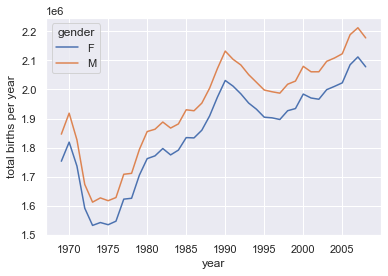

In [262]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

借助一个简单的数据透视表和 plot() 方法，我们马上就可以发现不同性别出生率的趋势。通过肉眼观察，得知过去 50 年间的男性出生率比女性出生率高 5%。

### 深入探索

虽然使用数据透视表并不是必须的，但是通过 Pandas 的这个工具可以展现一些有趣的特征。我们必须对数据做一点儿清理工作，消除由于输错了日期而造成的异常点（如 6 月 31号）或者是缺失值（如 1999 年 6 月）。消除这些异常的简便方法就是直接删除异常值，可
以通过更稳定的 sigma 消除法（sigma-clipping，按照正态分布标准差划定范围，SciPy 中默认是四个标准差）操作来实现：

In [263]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

最后一行是样本均值的稳定性估计（robust estimate），其中 0.74 是指标准正态分布的分位
数间距。在 query() 方法中用这个范围就可以将有效的生日数据筛选出来了：

In [264]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

然后，将 day 列设置为整数。这列数据在筛选之前是字符串，因为数据集中有的列含有缺失值 'null'：

In [265]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

现在就可以将年月日组合起来创建一个日期索引了，这样就可以快速计算每一行是星期几：

In [266]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

用这个索引可以画出不同年代不同星期的日均出生数据

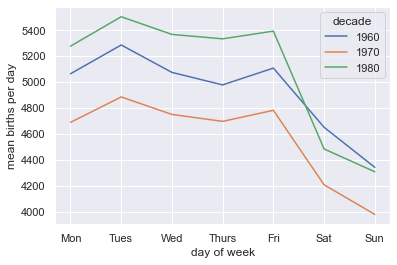

In [267]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.xlabel('day of week');
plt.ylabel('mean births per day');
plt.gca().set_xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.show()

由图可知，周末的出生人数比工作日要低很多。另外，因为 CDC 只提供了 1989 年之前的数据，所以没有 20 世纪 90 年代和 21 世纪的数据。

另一个有趣的图表是画出各个年份平均每天的出生人数，可以按照月和日两个维度分别对数据进行分组：

In [268]:
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

如果只关心月和日的话，这就是一个可以反映一年中平均每天出生人数的时间序列。可以用 plot 方法将数据画成图，从图中可以看到一些有趣的趋势

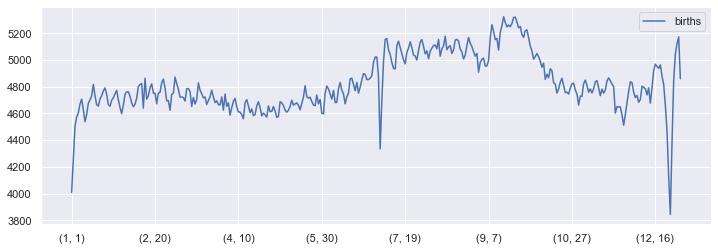

In [269]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

从图中可以明显看出，在美国节假日的时候，出生人数急速下降（例如美国独立日、劳动节、感恩节、圣诞节以及新年）。这种现象可能是由于医院放假导致的接生减少（自己在家生），而非某种自然生育的心理学效应。

通过这个简单的案例，你会发现许多前面介绍过的 Python 和 Pandas 工具都可以相互结合，并用于从大量数据集中获取信息。我们将在后面的章节中介绍如何用这些工具创建更复杂的应用。

# 向量化字符串操作

使用 Python 的一个优势就是字符串处理起来比较容易。在此基础上创建的 Pandas 同样提供了一系列向量化字符串操作（vectorized string operation），它们都是在处理（清洗）现实工作中的数据时不可或缺的功能。接下来我们将介绍 Pandas 的字符串操作，学习如何用它们对一个从网络采集来的杂乱无章的数据集进行局部清理。

## Pandas 字符串操作简介

前面已经介绍过如何用 NumPy 和 Pandas 进行一般的运算操作，因此我们也能简便快速地对多个数组元素执行同样的操作，例如：

In [270]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

向量化操作简化了纯数值的数组操作语法——我们不需要再担心数组的长度或维度，只需要关心需要的操作。然而，由于 NumPy 并没有为字符串数组提供简单的接口，因此需要通过繁琐的 for 循环来解决问题：

In [271]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

虽然这么做对于某些数据可能是有效的，但是假如数据中出现了缺失值，那么这样做就会引起异常，例如：

In [272]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

Pandas 为包含字符串的 Series 和 Index 对象提供的 str 属性堪称两全其美的方法，它既可以满足向量化字符串操作的需求，又可以正确地处理缺失值。例如，我们用前面的数据 data 创建了一个 Pandas 的 Series：

In [273]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

现在就可以直接调用转换大写方法 capitalize() 将所有的字符串变成大写形式，缺失值会被跳过：

In [274]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

在 str 属性后面用 Tab 键，可以看到 Pandas 支持的所有向量化字符串方法。

## Pandas 字符串方法列表

如果你熟悉 Python 的字符串方法的话，就会发现 Pandas 绝大多数的字符串语法都很直观，甚至可以列成一个表格。在深入论述后面的内容之前，让我们先从这一步开始。这一节的示例将采用一些人名来演示：

In [275]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

### 与 Python 字符串方法相似的方法
几乎所有 Python 内置的字符串方法都被复制到 Pandas 的向量化字符串方法中。下面的表格列举了 Pandas 的 str 方法借鉴 Python 字符串方法的内容：

|             |                  |                  |                  |
|-------------|------------------|------------------|------------------|
|``len()``    | ``lower()``      | ``translate()``  | ``islower()``    | 
|``ljust()``  | ``upper()``      | ``startswith()`` | ``isupper()``    | 
|``rjust()``  | ``find()``       | ``endswith()``   | ``isnumeric()``  | 
|``center()`` | ``rfind()``      | ``isalnum()``    | ``isdecimal()``  | 
|``zfill()``  | ``index()``      | ``isalpha()``    | ``split()``      | 
|``strip()``  | ``rindex()``     | ``isdigit()``    | ``rsplit()``     | 
|``rstrip()`` | ``capitalize()`` | ``isspace()``    | ``partition()``  | 
|``lstrip()`` |  ``swapcase()``  |  ``istitle()``   | ``rpartition()`` |

需要注意的是，这些方法的返回值不同，例如 lower() 方法返回一个字符串 Series：

In [276]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

但是有些方法返回数值：

In [277]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

有些方法返回布尔值：

In [278]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

还有些方法返回列表或其他复合值：

In [279]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

在接下来的内容中，我们将进一步学习这类由列表元素构成的 Series（series-of-lists）对象。

### 使用正则表达式的方法

还有一些支持正则表达式的方法可以用来处理每个字符串元素。表中的内容是 Pandas 向量化字符串方法根据 Python 标准库的 re 模块函数实现的 API。

| Method | Description |
|--------|-------------|
| ``match()`` | Call ``re.match()`` on each element, returning a boolean. |
| ``extract()`` | Call ``re.match()`` on each element, returning matched groups as strings.|
| ``findall()`` | Call ``re.findall()`` on each element |
| ``replace()`` | Replace occurrences of pattern with some other string|
| ``contains()`` | Call ``re.search()`` on each element, returning a boolean |
| ``count()`` | Count occurrences of pattern|
| ``split()``   | Equivalent to ``str.split()``, but accepts regexps |
| ``rsplit()`` | Equivalent to ``str.rsplit()``, but accepts regexps |

通过这些方法，你就可以实现各种有趣的操作了。例如，可以提取元素前面的连续字母作为每个人的名字（first name）：

In [280]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

我们还能实现更复杂的操作，例如找出所有开头和结尾都是辅音字母的名字——这可以用
则表达式中的开始符号（^）与结尾符号（$）来实现：

In [281]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

能将正则表达式应用到 Series 与 DataFrame 之中的话，就有可能实现更多的数据分析与清洗方法。

### 其他字符串方法
还有其他一些方法也可以实现方便的操作：

| Method | Description |
|--------|-------------|
| ``get()`` | Index each element |
| ``slice()`` | Slice each element|
| ``slice_replace()`` | Replace slice in each element with passed value|
| ``cat()``      | Concatenate strings|
| ``repeat()`` | Repeat values |
| ``normalize()`` | Return Unicode form of string |
| ``pad()`` | Add whitespace to left, right, or both sides of strings|
| ``wrap()`` | Split long strings into lines with length less than a given width|
| ``join()`` | Join strings in each element of the Series with passed separator|
| ``get_dummies()`` | extract dummy variables as a dataframe |

#### 向量化字符串的取值与切片操作

这里需要特别指出的是，get() 与 slice() 操作可以
从每个字符串数组中获取向量化元素。例如，我们可以通过 str.slice(0, 3) 获取每个字符串数组的前三个字符。通过 Python 的标准取值方法也可以取得同样的效果，例如 df.str.slice(0, 3) 等价于 df.str[0:3]：

In [282]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

df.str.get(i) 与 df.str[i] 的按索引取值效果类似。

get() 与 slice() 操作还可以在 split() 操作之后使用。例如，要获取每个姓名的姓（last name），可以结合使用 split() 与 get()：

In [283]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

#### 指标变量

另一个需要多花点儿时间解释的是 get_dummies() 方法。当你的数据有一列包含了若干已被编码的指标（coded indicator）时，这个方法就能派上用场了。例如，假设有一个包含了某种编码信息的数据集，如 A= 出生在美国、B= 出生在英国、C= 喜欢奶酪、D= 喜欢午餐肉：

In [284]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


get_dummies() 方法可以让你快速将这些指标变量分割成一个 DataFrame（每个元素都是 0 或 1）：

In [285]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


通过 Pandas 自带的这些字符串操作方法，你就可以建立一个功能无比强大的字符串处理程序来清洗自己的数据了。

数据科学的真相就是：真实数据的清洗与整理工作往往会占据的大部分时间，而使用 Pandas 提供的工具可以提高你的工作效率。

# 处理时间序列

由于 Pandas 最初是为金融模型而创建的，因此它拥有一些功能非常强大的日期、时间、带时间索引数据的处理工具。这里将介绍的日期与时间数据主要包含三类。

- 时间戳表示某个具体的时间点（例如 2015 年 7 月 4 日上午 7 点）。
- 时间间隔与周期表示开始时间点与结束时间点之间的时间长度，例如 2015 年（指的是
2015 年 1 月 1 日至 2015 年 12 月 31 日这段时间间隔）。周期通常是指一种特殊形式的
时间间隔，每个间隔长度相同，彼此之间不会重叠（例如，以 24 小时为周期构成每一天）。
- 时间增量（time delta）或持续时间（duration）表示精确的时间长度（例如，某程序运
行持续时间 22.56 秒）。

在开始介绍 Pandas 的时间序列工具之前，我们先简单介绍一下 Python 处理日期与时间数据的工具。在介绍完一些值得深入学习的资源之后，再通过一些简短的示例来演示 Pandas 处理时间序列数据的方法。

## Python 的日期与时间工具

在 Python 标准库与第三方库中有许多可以表示日期、时间、时间增量和时间跨度（timespan）的工具。尽管 Pandas 提供的时间序列工具更适合用来处理数据科学问题，但是了解 Pandas 与 Python 标准库以及第三方库中的其他时间序列工具之间的关联性将大有裨益。

### 原生Python的日期与时间工具：datetime与dateutil

Python 基本的日期与时间功能都在标准库的 datetime 模块中。如果和第三方库 dateutil 模块搭配使用，可以快速实现许多处理日期与时间的功能。例如，你可以用 datetime 类型创建一个日期：

In [286]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

或者使用 dateutil 模块对各种字符串格式的日期进行正确解析：

In [287]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

一旦有了 datetime 对象，就可以进行许多操作了，例如打印出这一天是星期几：

In [288]:
date.strftime('%A')

'Saturday'

在最后一行代码中，为了打印出是星期几，我们使用了一个标准字符串格式（standard 
string format）代码 "%A"，你可以在 [Python 的 datetime 文档](https://docs.python.org/3/library/datetime.html)的[“strftime”节](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)查看具体信息。关于 dateutil 的其他日期功能可以通过 [dateutil 的在线文档](http://labix.org/python-dateutil)学习。还有一个值得关注的程序包是 [pytz](http://pytz.sourceforge.net/)，这个工具解决了绝大多数时间序列数据都会遇到的难题：时区。

datetime 和 dateutil 模块在灵活性与易用性方面都表现出色，你可以用这些对象及其相应的方法轻松完成你感兴趣的任意操作。但如果你处理的时间数据量比较大，那么速度就会比较慢。就像之前介绍过的 Python 的原生列表对象没有 NumPy 中已经被编码的数值类型数组的性能好一样，Python 的原生日期对象同样也没有 NumPy 中已经被编码的日期（encoded dates）类型数组的性能好。

### 时间类型数组：NumPy 的 datetime64 类型

Python 原生日期格式的性能弱点促使 NumPy 团队为 NumPy 增加了自己的时间序列类型。datetime64 类型将日期编码为 64 位整数，这样可以让日期数组非常紧凑（节省内存）。datetime64 需要在设置日期时确定具体的输入类型：

In [289]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

但只要有了这个日期格式，就可以进行快速的向量化运算：

In [290]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

因为 NumPy 的 datetime64 数组内元素的类型是统一的，所以这种数组的运算速度会比 Python 的 datetime 对象的运算速度快很多，尤其是在处理较大数组时

atetime64 与 timedelta64 对 象 的 一 个 共 同 特 点 是， 它 们 都 是 在 基本时间单位
（fundamental time unit）的基础上建立的。由于 datetime64 对象是 64 位精度，所以可编码的时间范围可以是基本单元的 264 倍。也就是说，datetime64 在时间精度（time resolution）与最大时间跨度（maximum time span）之间达成了一种平衡。

比如你想要一个时间纳秒（nanosecond，ns）级的时间精度，那么你就可以将时间编码到0~264 纳秒或 600 年之内，NumPy 会自动判断输入时间需要使用的时间单位。例如，下面是一个以天为单位的日期：

In [291]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

而这是一个以分钟为单位的日期：

In [292]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

需要注意的是，时区将自动设置为执行代码的操作系统的当地时区。你可以通过各种格式的代码设置基本时间单位。例如，将时间单位设置为纳秒：

In [293]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

NumPy 的 [datetime64 文档](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)
总结了所有支持相对与绝对时间跨度的时间与日期单位格式代码，下表对此总结如下。

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

对于日常工作中的时间数据类型，默认单位都用纳秒 datetime64[ns]，因为用它来表示时间范围精度可以满足绝大部分需求。

最后还需要说明一点，虽然 datetime64 弥补了 Python 原生的 datetime 类型的不足，但它缺少了许多 datetime（尤其是 dateutil）原本具备的便捷方法与函数。

###  Pandas 的日期与时间工具：理想与现实的最佳解决方案

andas 所有关于日期与时间的处理方法全部都是通过 Timestamp 对象实现的，它利用 numpy.datetime64 的有效存储和向量化接口将 datetime 和 dateutil 的易用性有机结合起来。Pandas 通过一组 Timestamp 对象就可以创建一个可以作为 Series 或 DataFrame 索引的DatetimeIndex，我们将在后面介绍许多类似的例子。

例如，可以用 Pandas 的方式演示前面介绍的日期与时间功能。我们可以灵活处理不同格式的日期与时间字符串，获取某一天是星期几：

In [294]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [295]:
date.strftime('%A')

'Saturday'

另外，也可以直接进行 NumPy 类型的向量化运算：

In [296]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

下面将详细介绍 Pandas 用来处理时间序列数据的工具。

## Pandas 时间序列：用时间作索引

Pandas 时间序列工具非常适合用来处理带时间戳的索引数据。例如，我们可以通过一个时间索引数据创建一个 Series 对象：

In [297]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

有了一个带时间索引的 Series 之后，就能用它来演示之前介绍过的 Series 取值方法，可以直接用日期进行切片取值：

In [298]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

另外，还有一些仅在此类 Series 上可用的取值操作，例如直接通过年份切片获取该年的数据：

In [299]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

下面将介绍一些示例，体现将日期作为索引为运算带来的便利性。在此之前，让我们仔细看看现有的时间序列数据结构。

## Pandas 时间序列数据结构

下面将介绍 Pandas 用来处理时间序列的基础数据类型。

- 针对时间戳数据，Pandas 提供了 Timestamp 类型。与前面介绍的一样，它本质上是 Python 的原生 datetime 类型的替代品，但是在性能更好的 numpy.datetime64 类型的基础上创建。对应的索引数据结构是 DatetimeIndex。
- 针对时间周期数据，Pandas 提供了 Period 类型。这是利用 numpy.datetime64 类型将固定频率的时间间隔进行编码。对应的索引数据结构是 PeriodIndex。
- 针对时间增量或持续时间，Pandas 提供了 Timedelta 类型。Timedelta 是一种代替 Python 原生 datetime.timedelta 类型的高性能数据结构，同样是基于 numpy.timedelta64 类型。对应的索引数据结构是 TimedeltaIndex。

最基础的日期 / 时间对象是 Timestamp 和 DatetimeIndex。这两种对象可以直接使用，最常用的方法是 pd.to_datetime() 函数，它可以解析许多日期与时间格式。对 pd.to_datetime() 传递一个日期会返回一个 Timestamp 类型，传递一个时间序列会返回一个 DatetimeIndex 类型：

In [300]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

任何 DatetimeIndex 类型都可以通过 to_period() 方法和一个频率代码转换成 PeriodIndex 类型。下面用 'D' 将数据转换成单日的时间序列：

In [301]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

当用一个日期减去另一个日期时，返回的结果是 TimedeltaIndex 类型：

In [302]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### 有规律的时间序列：pd.date_range()

为了能更简便地创建有规律的时间序列，Pandas 提供了一些方法：pd.date_range() 可以处理时间戳、pd.period_range() 可以处理周期、pd.timedelta_range() 可以处理时间间隔。我们已经介绍过，Python 的 range() 和 NumPy 的 np.arange() 可以用起点、终点和步长（可选的）创建一个序列。pd.date_range() 与之类似，通过开始日期、结束日期和频率代码（同样是可选的）创建一个有规律的日期序列，默认的频率是天：

In [303]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

此外，日期范围不一定非是开始时间与结束时间，也可以是开始时间与周期数 periods：

In [304]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

你可以通过 freq 参数改变时间间隔，默认值是 D。例如，可以创建一个按小时变化的时间戳：

In [305]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

如果要创建一个有规律的周期或时间间隔序列，有类似的函数 pd.period_range() 和 pd.timedelta_range()。下面是一个以月为周期的示例：

In [306]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

以及一个以小时递增的序列：

In [307]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

掌握 Pandas 频率代码是使用所有这些时间序列创建方法的必要条件。接下来，我们将总结这些代码。

## 时间频率与偏移量

Pandas 时间序列工具的基础是时间频率或偏移量（offset）代码。就像之前见过的 D（day） 和 H（hour）代码，我们可以用这些代码设置任意需要的时间间隔。下表总结了主要的频率代码。

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

月、季、年频率都是具体周期的结束时间（月末、季末、年末），而有一些以 S（start，开始）为后缀的代码表示日期开始（如下表所示）。

| Code    | Description            || Code    | Description            |
|---------|------------------------||---------|------------------------|
| ``MS``  | Month start            ||``BMS``  | Business month start   |
| ``QS``  | Quarter start          ||``BQS``  | Business quarter start |
| ``AS``  | Year start             ||``BAS``  | Business year start    |

另外，你可以在频率代码后面加三位月份缩写字母来改变季、年频率的开始时间。

- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
- ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

同理，也可以在后面加三位星期缩写字母来改变一周的开始时间。

- ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

在这些代码的基础上，还可以将频率组合起来创建的新的周期。例如，可以用小时（H）和分钟（T）的组合来实现 2 小时 30 分钟：

In [308]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

所有这些频率代码都对应 Pandas 时间序列的偏移量，具体内容可以在 pd.tseries.offsets 模块中找到。例如，可以用下面的方法直接创建一个工作日偏移序列：

In [309]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## 重新取样、迁移和窗口

用日期和时间直观地组织与获取数据是 Pandas 时间序列工具最重要的功能之一。Pandas 不仅支持普通索引功能（合并数据时自动索引对齐、直观的数据切片和取值方法等），还专为时间序列提供了额外的操作。

下面让我们用一些股票数据来演示这些功能。由于 Pandas 最初是为金融数据模型服务的，因此可以用它非常方便地获取金融数据。例如，pandas-datareader 程序包（可以通过 conda install pandas-datareader 进行安装）知道如何从一些可用的数据源导入金融数据，包含 Yahoo 财经、Google 财经和其他数据源。下面来导入 Google 的历史股票价格：

In [310]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2014', end='2016',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,27.920347,27.553225,27.702166,27.913124,54519590.0,27.913124
2014-01-02,27.839401,27.603037,27.782366,27.724083,73129082.0,27.724083
2014-01-03,27.818977,27.520098,27.770908,27.521841,66917888.0,27.521841
2014-01-06,27.867046,27.557707,27.721344,27.828691,71037271.0,27.828691
2014-01-07,28.385853,27.924334,28.019974,28.365179,102486711.0,28.365179


出于简化的目的，这里只用收盘价：

In [311]:
goog = goog['Close']

设置 Matplotlib 之后，就可以通过 plot() 画出可视化图了

In [312]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

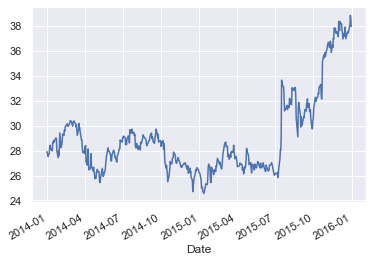

In [313]:
goog.plot();

### 重新取样与频率转换

处理时间序列数据时，经常需要按照新的频率（更高频率、更低频率）对数据进行重新取样。你可以通过 resample() 方法解决这个问题，或者用更简单的 asfreq() 方法。这两个方法的主要差异在于，resample() 方法是以数据累计（data aggregation）为基础，而 asfreq() 方法是以数据选择（data selection）为基础。

看到 Google 的收盘价之后，让我们用两种方法对数据进行向后取样（down-sample）。这里用年末（'BA'，最后一个工作日）对数据进行重新取样：

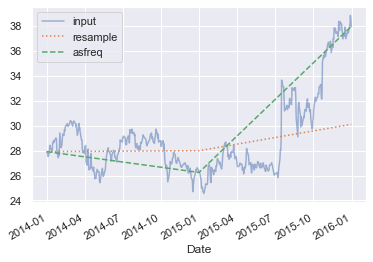

In [314]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

请注意这两种取样方法的差异：在每个数据点上，resample 反映的是上一年的均值，而 asfreq 反映的是上一年最后一个工作日的收盘价。

请注意这两种取样方法的差异：在每个数据点上，resample 反映的是上一年的均值，而
asfreq 反映的是上一年最后一个工作日的收盘价。
在进行向前取样（up-sampling）时，resample() 与 asfreq() 的用法大体相同，不过重新取
样有许多种配置方式。操作时，两种方法都默认将向前取样作为缺失值处理，也就是说在
里面填充 NaN。与前面介绍过的 pd.fillna() 函数类似，asfreq() 有一个 method 参数可以
设置填充缺失值的方式。下面将对工作日数据按天进行重新取样（即包含周末）：

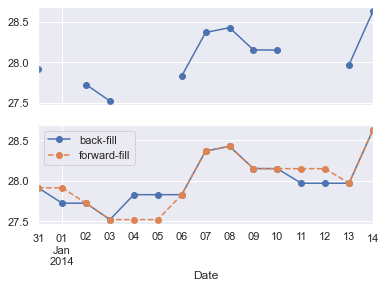

In [315]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

上面那幅图是原始数据：非工作日的股价是缺失值，所以不会出现在图上。而下面那幅图通过向前填充与向后填充这两种方法填补了缺失值。

### 时间迁移

另一种常用的时间序列操作是对数据按时间进行迁移，即shift()函数。

下面我们将用 shift() 让数据迁移 100 天：

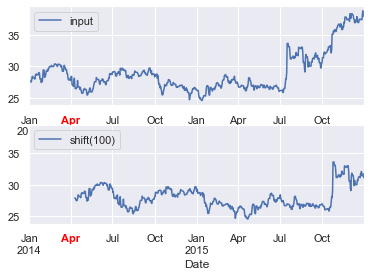

In [316]:
fig, ax = plt.subplots(2, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(100).plot(ax=ax[1])

# legends and annotations
local_max = pd.to_datetime('2016-12-31')
offset = pd.Timedelta(10, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(100)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

我们会发现，shift(100) 将数据向前推进了 100 天，这样图形中的一段就消失了（最左侧就变成了缺失值）

这类迁移方法的常见使用场景就是计算数据在不同时段的差异。例如，我们可以用迁移后的值来计算 Google 股票一年期的投资回报率：

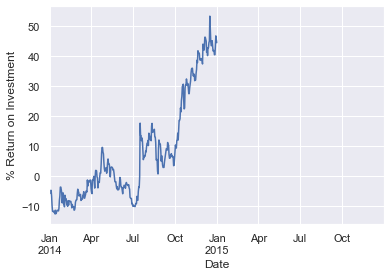

In [317]:
ROI = 100 * (goog.shift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

###  移动时间窗口

Pandas 处理时间序列数据的第 3 种操作是移动统计值（rolling statistics）。这些指标可以通过 Series 和 DataFrame 的 rolling() 属性来实现，它会返回与 groupby 操作类似的结果。移动视图（rolling view）使得许多累计操作成为可能。

与 groupby 操作一样，aggregate() 和 apply() 方法都可以用来自定义移动计算。

## 更多学习资料

Wes McKinney（Pandas 创建者）所著的《利用 Python 进行数据分析》。虽然这本书已经有些年头了，但仍然是学习 Pandas 的好资源，尤其是这本书重点介绍了时间序列工具在商业与金融业务中的应用，作者用大量笔墨介绍了工作日历、时区和相关主题的具体内容。

你当然可以用 IPython 的帮助功能来浏览和深入探索上面介绍过的函数与方法，这可能是学习各种 Python 工具的最佳途径。

## 案例：美国西雅图自行车统计数据的可视化

下面来介绍一个比较复杂的时间序列数据，统计自 2012 年以来每天经过美国西雅图弗莱蒙特桥上的自行车的数
量，数据由安装在桥东西两侧人行道的传感器采集。

可以用 Pandas 读取 CSV 文件获取一个 DataFrame。我们将 Date 作为时间索引，并希望这些日期可以被自动解析：

In [320]:
data = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


为了方便后面的计算，缩短数据集的列名：

In [321]:
data.columns = ['Total', 'East', 'West']

现在来看看这三列的统计值：

In [322]:
data.dropna().describe()

,Total,East,West
count,151598.000000,151598.000000,151598.000000
mean,109.497098,49.585463,59.911635
std,139.334944,64.073157,86.540658
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,27.000000,30.000000
75%,144.000000,67.000000,74.000000
max,1097.000000,698.000000,850.000000


###  数据可视化

通过可视化，我们可以对数据集有一些直观的认识。先画出原始数据画图：

In [323]:
%matplotlib inline
import seaborn; seaborn.set()

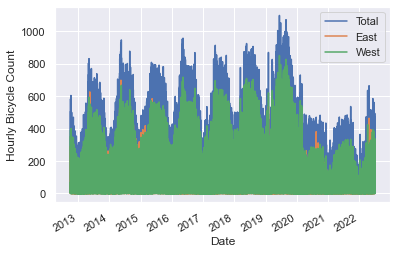

In [324]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

在图中显示的样本数据对我们来说实在太多了，因此可以通过重新取样将数据转换成更大的颗粒度，比如按周累计：

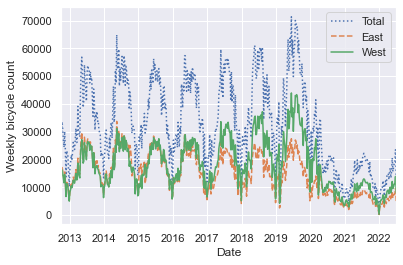

In [325]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

这就显示出一些季节性的特征了。正如你所想，夏天骑自行车的人比冬天多，而且某个季节中每一周的自行车数量也在变化。

另一种对数据进行累计的简便方法是用 pd.rolling_mean() 函数求移动平均值。下面将计算数据的 30 日移动均值，并让图形在窗口居中显示（center=True）：

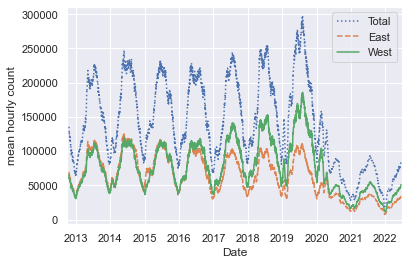

In [326]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

由于窗口太小，现在的图形还不太平滑。我们可以用另一个移动均值的方法获得更平滑的图形，例如高斯分布时间窗口。下面的代码将设置窗口的宽度（选择 50 天）和窗口内高斯平滑的宽度（选择 10 天）：

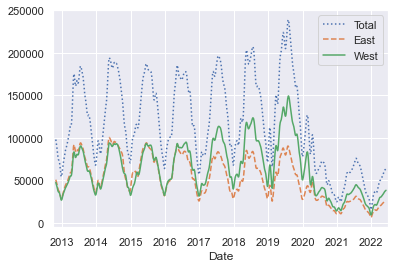

In [327]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

### 深入挖掘数据

虽然我们已经从上图的平滑数据图观察到了数据的总体趋势，但是它们还隐藏了一些有趣的特征。例如，我们可能希望观察单日内的小时均值流量，这可以通过 GroupBy 操作来解决：

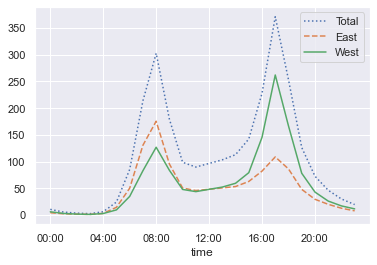

In [328]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

小时均值流量呈现出十分明显的双峰分布特征，早间峰值在上午 8 点，晚间峰值在下午 5 点。这充分反映了过桥上下班往返自行车流量的特征。进一步分析会发现，桥西的高峰在早上（因为人们每天会到西雅图的市中心上班），而桥东的高峰在下午（下班再从市中心离开）。

我们可能还会对周内每天的变化产生兴趣，这时依然可以通过一个简单的 groupby 来实现：

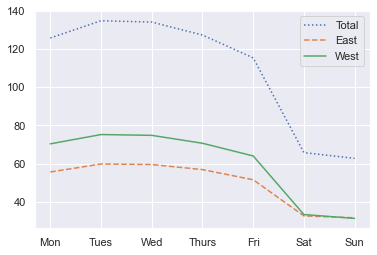

In [329]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

工作日与周末的自行车流量差十分显著，周一到周五通过的自行车差不多是周六、周日的两倍。

看到这个特征之后，让我们用一个复合 groupby 来观察一周内工作日与双休日每小时的数据。用一个标签表示双休日和工作日的不同小时：

In [330]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

现在用一些 Matplotlib 工具画出两张图：

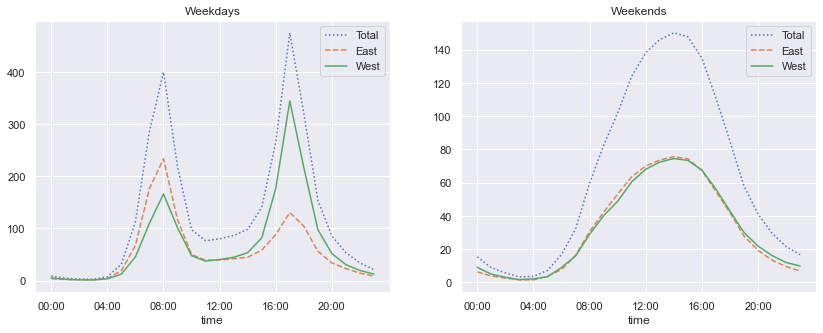

In [331]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

结果很有意思，我们会发现工作日的自行车流量呈双峰通勤模式（bimodal commute pattern），而到了周末就变成了单峰娱乐模式（unimodal recreational pattern）。假如继续挖掘数据应该还会发现更多有趣的信息，比如研究天气、温度、一年中的不同时间以及其他因素对人们通勤模式的影响。

# 高性能 Pandas：eval() 与 query()

前面的章节已经介绍过，Python 数据科学生态环境的强大力量建立在 NumPy 与 Pandas 的基础之上，并通过直观的语法将基本操作转换成 C 语言：在 NumPy 里是向量化 / 广播运算，在 Pandas 里是分组型的运算。虽然这些抽象功能可以简洁高效地解决许多问题，但是它们经常需要创建临时中间对象，这样就会占用大量的计算时间与内存。

Pandas 从 0.13 版开始（2014 年 1 月）就引入了实验性工具，让用户可以直接运行 C 语言速度的操作，不需要十分费力地配置中间数组。它们就是 eval() 和 query() 函数，都依赖于 [Numexpr](https://github.com/pydata/numexpr)程序包。我们将在下面的 Notebook 中演示其用法，并介绍一些使用时的注意事项。

## query() 与 eval() 的设计动机：复合代数式

前面已经介绍过，NumPy 与 Pandas 都支持快速的向量化运算。例如，你可以对下面两个数组进行求和：

In [332]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(1000000)
y = rng.rand(1000000)
%timeit x + y

1.71 ms ± 214 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


这样做比普通的 Python 循环或列表综合要快很多：

In [333]:
%timeit np.fromiter((xi + yi for xi, yi in zip(x, y)), dtype=x.dtype, count=len(x))

277 ms ± 33.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


但是这种运算在处理复合代数式（compound expression）问题时的效率比较低，例如下面的表达式：

In [334]:
mask = (x > 0.5) & (y < 0.5)

由于 NumPy 会计算每一个代数子式，因此这个计算过程等价于：

In [335]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

也就是说，每段中间过程都需要显式地分配内存。如果 x 数组和 y 数组非常大，这么运算就会占用大量的时间和内存消耗。Numexpr 程序库可以让你在不为中间过程分配全部内存的前提下，完成元素到元素的复合代数式运算。虽然 Numexpr 文档里提供了更详细的内容，但是简单点儿说，这个程序库其实就是用一个 NumPy 风格的字符串代数式进行运算：

In [336]:
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

True

这么做的好处是，由于 Numexpr 在计算代数式时不需要为临时数组分配全部内存，因此计算比 NumPy 更高效，尤其适合处理大型数组。马上要介绍的 Pandas 的 eval() 和 query() 工具其实也是基于 Numexpr 实现的。

## 用 pandas.eval() 实现高性能运算

Pandas 的 eval() 函数用字符串代数式实现了 DataFrame 的高性能运算，例如下面的 DataFrame：

In [337]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

如果要用普通的 Pandas 方法计算四个 DataFrame 的和，可以这么写：

In [338]:
%timeit df1 + df2 + df3 + df4

47.9 ms ± 2.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


也可以通过 pd.eval 和字符串代数式计算并得出相同的结果：

In [339]:
%timeit pd.eval('df1 + df2 + df3 + df4')

22.1 ms ± 908 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


目前经过 Pandas 不断的版本迭代和优化，普通的 Pandas 计算方法在一些运算的效率已经与 eval() 方法差距不大，但eval() 方法仍然可以节省内存。可以看到，两种方式的计算结果是一样的：

In [340]:
np.allclose(df1 + df2 + df3 + df4,
            pd.eval('df1 + df2 + df3 + df4'))

True

### pd.eval() 支持的运算

从 Pandas v0.16 版开始，pd.eval() 就支持许多运算了。为了演示这些运算，创建一个整数类型的 DataFrame：

In [341]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                           for i in range(5))

#### 算术运算符
pd.eval() 支持所有的算术运算符，例如：

In [342]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

#### 比较运算符
pd.eval() 支持所有的比较运算符，包括链式代数式（chained expression）：

In [343]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

#### 位运算符
pd.eval() 支持 &（与）和 |（或）等位运算符：

In [344]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

另外，你还可以在布尔类型的代数式中使用 and 和 or 等字面值：

In [345]:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

#### 对象属性与索引

pd.eval() 可以通过 obj.attr 语法获取对象属性，通过 obj[index] 语法获取对象索引：

In [346]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

#### 其他运算
目前 pd.eval() 还不支持函数调用、条件语句、循环以及更复杂的运算。如果你想要进行这些运算，可以借助 Numexpr 来实现。

## 用 DataFrame.eval() 实现列间运算

由于 pd.eval() 是 Pandas 的顶层函数，因此 DataFrame 有一个 eval() 方法可以做类似的运算。使用 eval() 方法的好处是可以借助列名称进行运算，示例如下：

In [347]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


如果用前面介绍的 pd.eval()，就可以通过下面的代数式计算这三列：

In [348]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

而 DataFrame.eval() 方法可以通过列名称实现简洁的代数式：

In [349]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

请注意，这里用列名称作为变量来计算代数式，结果同样是正确的。

### 用 DataFrame.eval() 新增列

除了前面介绍的运算功能，DataFrame.eval() 还可以创建新的列。还用前面的 DataFrame 来演示，列名是 'A'、'B' 和 'C':

In [350]:
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


可以用 df.eval() 创建一个新的列 'D'，然后赋给它其他列计算的值：

In [351]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


还可以修改已有的列：

In [352]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,-0.449425
1,0.069087,0.235615,0.154374,-1.078728
2,0.677945,0.433839,0.652324,0.374209
3,0.264038,0.808055,0.347197,-1.566886
4,0.589161,0.252418,0.557789,0.603708


###  DataFrame.eval() 使用局部变量

DataFrame.eval() 方法还支持通过 @ 符号使用 Python 的局部变量，如下所示：

In [353]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

@ 符号表示“这是一个变量名称而不是一个列名称”，从而让你灵活地用两个“命名空间”的资源（列名称的命名空间和 Python 对象的命名空间）计算代数式。需要注意的
是，@ 符号只能在 DataFrame.eval() 方法中使用，而不能在 pandas.eval() 函数中使用，因为 pandas.eval() 函数只能获取一个（Python）命名空间的内容。

## DataFrame.query() 方法

DataFrame 基于字符串代数式的运算实现了另一个方法，被称为 query()，例如：

In [354]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

和前面介绍过的 DataFrame.eval() 一样，这是一个用 DataFrame 列创建的代数式，但是不能用 DataFrame.eval() 语法。不过，对于这种过滤运算，你可以用 query() 方法：

In [355]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

除了计算性能更优之外，这种方法的语法也比掩码代数式语法更好理解。需要注意的是，query() 方法也支持用 @ 符号引用局部变量：

In [356]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True

## 性能决定使用时机

在考虑要不要用这两个函数时，需要思考两个方面：计算时间和内存消耗，而内存消耗是更重要的影响因素。就像前面介绍的那样，每个涉及 NumPy 数组或 Pandas 的 DataFrame 的复合代数式都会产生临时数组，例如：

In [357]:
x = df[(df.A < 0.5) & (df.B < 0.5)]

它基本等价于：

In [358]:
tmp1 = df.A < 0.5
tmp2 = df.B < 0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]

如果临时 DataFrame 的内存需求比你的系统内存还大，那么最好还是使用 eval() 和 query() 代数式。你可以通过下面的方法大概估算一下变量的内存消耗：

In [359]:
df.values.nbytes

32000

在性能方面，即使你没有使用最大的系统内存，eval() 的计算速度也比普通方法快。现在的性能瓶颈变成了临时 DataFrame 与系统 CPU 的 L1 和 L2 缓存之间的对比了——如果系统缓存足够大，那么 eval() 就可以避免在不同缓存间缓慢地移动临时文件。在实际工作中，普通的计算方法与 eval/ query 计算方法在计算时间上的差异并非总是那么明显，普通方法在处理较小的数组时反而速度更快！ eval/ query 方法的优点主要是节省内存，有时语法也更加简洁。

我们已经介绍了 eval() 与 query() 的绝大多数细节，若想了解更多的信息，请参考 Pandas 文档。

# 更多资料

我们已经介绍了许多关于如何通过 Pandas 实现高效数据分析的基础知识。如果你想学习更多的 Pandas 知识，推荐参考下面的资源。

- [Pandas online documentation](http://pandas.pydata.org/): 这是 Pandas 程序包最详细的文档。虽然文档中的示例都是在处理小数据集，但是它们内容完整、功能全面，对于理解各种函数非常有用。同时，它会保持和最新版本的Pandas同步更新。

- [*Python for Data Analysis*](http://shop.oreilly.com/product/0636920023784.do) 这是 Wes McKinney（Pandas 创建者）的著作，里面介绍了许多本章没有介绍的 Pandas 知识，非常详细。值得一提的是，由于作者曾经是一名金融分析师，因此他深刻论述了用 Pandas 处理时间序列的工具。这本书中还有许多有趣的示例，通过 Pandas 探索真实数据集的规律。但需要注意的是，由于这本书已经有些年头，而 Pandas 程序包作为开源项目，发展速度很快，所以许多新特性书中并没有介绍。

- [Stack Overflow](http://stackoverflow.com/questions/tagged/pandas): Pandas 的用户很多，只有你有问题，就可以到 Stack Overflow 上看看别人是不是已经问过同样的问题。使用 Pandas 的过程中，Google 等搜索引擎也必不可少。在你最喜欢的搜索引擎中敲入遇到的问题或异常，可能会得到比 Stack Overflow 上更多的答案。

- [Pandas on PyVideo](http://pyvideo.org/search?q=pandas): 从 PyCon 到 SciPy 再到 PyData，许多会议都有 Pandas 开发者和专家分享的教程。PyCon 的教程特别受欢迎，好评最多。

希望通过以上的全部内容和这些资源，可以让你学会如何通过 Pandas 解决工作中遇到的所有数据分析问题！